In [ ]:
9# BHANUSHRAY GUPTA
# DPRE1 INHIBITOR
# REGRESSION MODELS

In [ ]:
# Data manipulation and EDA
import pandas as pd
import numpy as np
import glob

# Molecular descriptors calculation
from padelpy import padeldescriptor

# Machine learning models
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split


C:\Users\bhanu\AppData\Local\Temp\ipykernel_14340\594764653.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### DATA PREPROCESSING

In [ ]:
# FILE READ
FILE = 'trialdata.xlsx'
WORKSHEET = 'DATA'
FRAME = pd.read_excel(FILE, sheet_name=WORKSHEET)
FRAME1 = FRAME
FRAME2 = FRAME
FRAME.head()

,SMILES,IC50 uM,pIC50,MIC uM,pMIC,Activity,Binding,Class,logS,logD,...,Imini_One_A,Dyes5A,Quinone_D,Ene_Rhod_A,Keto_Keto_Beta_A,Het_Pyridiniums_A,Pyrrole_A,Pyrrole_B,Het_Thio_66_A,Azo_A
0,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...,NaN,NaN,NaN,"5,03",Active,Non-covalent,2-Carboxyquinoxalines,-0.2054,3.277,...,0,0,0,0,0,0,0,0,0,0
1,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OC)...,NaN,NaN,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.8469,2.158,...,0,0,0,0,0,0,0,0,0,0
2,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OC)...,NaN,NaN,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.9488,2.349,...,0,0,0,0,0,0,0,0,0,0
3,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(C(F...,NaN,NaN,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.2858,2.688,...,0,0,0,0,0,0,0,0,0,0
4,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(C(F...,NaN,NaN,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.3255,2.835,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
FRAME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SMILES                    1519 non-null   object 
 1   IC50 uM                   474 non-null    object 
 2   pIC50                     475 non-null    object 
 3   MIC uM                    813 non-null    object 
 4   pMIC                      1511 non-null   object 
 5   Activity                  1519 non-null   object 
 6   Binding                   1519 non-null   object 
 7   Class                     1519 non-null   object 
 8   logS                      1519 non-null   float64
 9   logD                      1519 non-null   float64
 10  hERG pIC50                1519 non-null   float64
 11  BBB log([brain]:[blood])  1519 non-null   float64
 12  BBB category              1519 non-null   object 
 13  P-gp category             1519 non-null   object 
 14  PPB90 ca

In [ ]:
FRAME

,SMILES,IC50 uM,pIC50,MIC uM,pMIC,Activity,Binding,Class,logS,logD,...,Imini_One_A,Dyes5A,Quinone_D,Ene_Rhod_A,Keto_Keto_Beta_A,Het_Pyridiniums_A,Pyrrole_A,Pyrrole_B,Het_Thio_66_A,Azo_A
0,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...,NaN,NaN,NaN,"5,03",Active,Non-covalent,2-Carboxyquinoxalines,-0.20540,3.277,...,0,0,0,0,0,0,0,0,0,0
1,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OC)...,NaN,NaN,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.84690,2.158,...,0,0,0,0,0,0,0,0,0,0
2,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OC)...,NaN,NaN,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.94880,2.349,...,0,0,0,0,0,0,0,0,0,0
3,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(C(F...,NaN,NaN,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.28580,2.688,...,0,0,0,0,0,0,0,0,0,0
4,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(C(F...,NaN,NaN,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.32550,2.835,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=NC=CS3)=O...,NaN,NaN,1.59e+04,"4,798634233",Not Active,Non-covalent,Thiophene-arylamides,1.57700,2.453,...,0,0,0,0,0,0,0,0,0,0
1515,CC[C@H](C)[C@@H]1[C@H](CC[C@@]2(O1)C[C@@H]3C[C...,"13,2","4,879426069",NaN,NaN,Not Active,Non-covalent,AVMT,0.14750,3.327,...,0,0,0,0,0,0,0,0,0,0
1516,CCC1C(C)CCC2(CC3CC(C/C=C(C)/CC(C)/C=C/C=C4COC5...,"25,5","4,59345982",NaN,NaN,Not Active,Non-covalent,AVMT,-0.08663,4.070,...,0,0,0,0,0,0,0,0,0,0
1517,CC(C)\C=C(/C)[C@H]5O[C@@]2(C[C@H]1OC(=O)[C@@H]...,"6,1","5,214670165",NaN,NaN,Not Active,Non-covalent,AVMT,0.17080,3.892,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
B = FRAME['pMIC']
A = FRAME['pIC50']

In [ ]:
A

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1514     NaN
1515    13,2
1516    25,5
1517     6,1
1518     2,6
Name: IC50 uM, Length: 1519, dtype: object

In [ ]:
B

0              5,03
1                <4
2                <4
3                <4
4                <4
           ...     
1514    4,798634233
1515            NaN
1516            NaN
1517            NaN
1518    5,283996656
Name: pMIC, Length: 1519, dtype: object

In [ ]:
# Count values that are NaN, '<', or '>'
INV_VAL_pIC50 = FRAME['pIC50'].isna().sum() + FRAME['pIC50'].astype(str).str.contains('<|>').sum()

print(f"Number of invalid values in 'pIC50' column: {INV_VAL_pIC50}")

Number of invalid values in 'pIC50' column: 1074


In [ ]:
# Count values that are NaN, '<', or '>'
INV_VAL_pMIC = FRAME['pMIC'].isna().sum() + FRAME['pMIC'].astype(str).str.contains('<|>').sum()

print(f"Number of invalid values in 'pMIC' column: {INV_VAL_pMIC}")

Number of invalid values in 'pMIC' column: 438


In [ ]:
# Count rows where both 'pIC50' and 'pMIC' have invalid values (NaN, '<', '>')
INV_VAL_BOTH = ((FRAME['pIC50'].isna() | FRAME['pIC50'].astype(str).str.contains('<|>')) &
                      (FRAME['pMIC'].isna() | FRAME['pMIC'].astype(str).str.contains('<|>'))).sum()

print(f"Number of rows with invalid values in both 'pIC50' and 'pMIC' columns: {INV_VAL_BOTH}")

Number of rows with invalid values in both 'pIC50' and 'pMIC' columns: 304


In [ ]:
1074 + 438 - 304

1208

In [ ]:
1519-1208

311

In [ ]:

FRAME1 = FRAME1.dropna(subset=['pIC50'])
FRAME1 = FRAME1[~FRAME1['pIC50'].astype(str).str.contains('<|>')]

FRAME1 = FRAME1.reset_index(drop=True)



In [ ]:
FRAME1

,SMILES,IC50 uM,pIC50,MIC uM,pMIC,Activity,Binding,Class,logS,logD,...,Imini_One_A,Dyes5A,Quinone_D,Ene_Rhod_A,Keto_Keto_Beta_A,Het_Pyridiniums_A,Pyrrole_A,Pyrrole_B,Het_Thio_66_A,Azo_A
0,FC(C1=CC=C2N=C(C)C(NCC3=CC=C(OC)C=C3)=NC2=C1)(F)F,22,"4,66",>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.02100,2.8530,...,0,0,0,0,0,0,0,0,0,0
1,FC(C1=CC=C2N=C(C)C(NCC3=CC=C(OC)C(OC)=C3)=NC2=...,20,"4,7",>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.95120,2.7430,...,0,0,0,0,0,0,0,0,0,0
2,OC(C1=NC2=CC=CC=C2N=C1NCC3=CC=C(OC)C=C3)=O,23,"4,64",>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.77200,0.1568,...,0,0,0,0,0,0,0,0,0,0
3,OC(C1=NC2=CC=CC=C2N=C1NCC3=CC=C(OC)C(OC)=C3)=O,33,"4,48",>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.84800,0.2388,...,0,0,0,0,0,0,0,0,0,0
4,FC1=CC=C(C=C1)CNC2=NC3=CC=CC=C3N=C2C(O)=O,16,"4,8",75,"4,12",Not Active,Non-covalent,2-Carboxyquinoxalines,1.33200,0.3863,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,CS(=O)(=O)c1cc2c(c(c1)N(=O)=O)sc(nc2=O)N3CCCN(...,"16,7","4,78",NaN,"6,026872146",Active,Covalent,Benzothiazinones,1.65300,1.4840,...,0,0,0,0,0,0,0,0,0,0
441,CC[C@H](C)[C@@H]1[C@H](CC[C@@]2(O1)C[C@@H]3C[C...,"13,2","4,879426069",NaN,NaN,Not Active,Non-covalent,AVMT,0.14750,3.3270,...,0,0,0,0,0,0,0,0,0,0
442,CCC1C(C)CCC2(CC3CC(C/C=C(C)/CC(C)/C=C/C=C4COC5...,"25,5","4,59345982",NaN,NaN,Not Active,Non-covalent,AVMT,-0.08663,4.0700,...,0,0,0,0,0,0,0,0,0,0
443,CC(C)\C=C(/C)[C@H]5O[C@@]2(C[C@H]1OC(=O)[C@@H]...,"6,1","5,214670165",NaN,NaN,Not Active,Non-covalent,AVMT,0.17080,3.8920,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
FRAME1['pIC50'] = FRAME1['pIC50'].str.replace(',', '.')

In [ ]:
Non_Conv_pIC50 = FRAME1[FRAME1['pIC50'].apply(pd.to_numeric, errors='coerce').isna()]
print(Non_Conv_pIC50[['pIC50']])
print(Non_Conv_pIC50.index)


       pIC50
396  #VALOR!
Index([396], dtype='int64')


In [ ]:

FRAME1 = FRAME1.drop(Non_Conv_pIC50.index)
FRAME1= FRAME1.reset_index(drop=True)


In [ ]:
FRAME1.to_excel("pIC50_DATASET.xlsx")

In [ ]:
FRAME1

,SMILES,IC50 uM,pIC50,MIC uM,pMIC,Activity,Binding,Class,logS,logD,...,Imini_One_A,Dyes5A,Quinone_D,Ene_Rhod_A,Keto_Keto_Beta_A,Het_Pyridiniums_A,Pyrrole_A,Pyrrole_B,Het_Thio_66_A,Azo_A
0,FC(C1=CC=C2N=C(C)C(NCC3=CC=C(OC)C=C3)=NC2=C1)(F)F,22,4.66,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.02100,2.8530,...,0,0,0,0,0,0,0,0,0,0
1,FC(C1=CC=C2N=C(C)C(NCC3=CC=C(OC)C(OC)=C3)=NC2=...,20,4.7,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.95120,2.7430,...,0,0,0,0,0,0,0,0,0,0
2,OC(C1=NC2=CC=CC=C2N=C1NCC3=CC=C(OC)C=C3)=O,23,4.64,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.77200,0.1568,...,0,0,0,0,0,0,0,0,0,0
3,OC(C1=NC2=CC=CC=C2N=C1NCC3=CC=C(OC)C(OC)=C3)=O,33,4.48,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.84800,0.2388,...,0,0,0,0,0,0,0,0,0,0
4,FC1=CC=C(C=C1)CNC2=NC3=CC=CC=C3N=C2C(O)=O,16,4.8,75,"4,12",Not Active,Non-covalent,2-Carboxyquinoxalines,1.33200,0.3863,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,CS(=O)(=O)c1cc2c(c(c1)N(=O)=O)sc(nc2=O)N3CCCN(...,"16,7",4.78,NaN,"6,026872146",Active,Covalent,Benzothiazinones,1.65300,1.4840,...,0,0,0,0,0,0,0,0,0,0
440,CC[C@H](C)[C@@H]1[C@H](CC[C@@]2(O1)C[C@@H]3C[C...,"13,2",4.879426069,NaN,NaN,Not Active,Non-covalent,AVMT,0.14750,3.3270,...,0,0,0,0,0,0,0,0,0,0
441,CCC1C(C)CCC2(CC3CC(C/C=C(C)/CC(C)/C=C/C=C4COC5...,"25,5",4.59345982,NaN,NaN,Not Active,Non-covalent,AVMT,-0.08663,4.0700,...,0,0,0,0,0,0,0,0,0,0
442,CC(C)\C=C(/C)[C@H]5O[C@@]2(C[C@H]1OC(=O)[C@@H]...,"6,1",5.214670165,NaN,NaN,Not Active,Non-covalent,AVMT,0.17080,3.8920,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

FRAME2 = FRAME2.dropna(subset=['pMIC'])
FRAME2 = FRAME2[~FRAME2['pMIC'].astype(str).str.contains('<|>')]

FRAME2 = FRAME2.reset_index(drop=True)


In [ ]:
FRAME2

,SMILES,IC50 uM,pIC50,MIC uM,pMIC,Activity,Binding,Class,logS,logD,...,Imini_One_A,Dyes5A,Quinone_D,Ene_Rhod_A,Keto_Keto_Beta_A,Het_Pyridiniums_A,Pyrrole_A,Pyrrole_B,Het_Thio_66_A,Azo_A
0,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...,NaN,NaN,NaN,"5,03",Active,Non-covalent,2-Carboxyquinoxalines,-0.2054,3.2770,...,0,0,0,0,0,0,0,0,0,0
1,FC1=CC=C(C=C1)CNC2=NC3=CC=CC=C3N=C2C(O)=O,16,"4,8",75,"4,12",Not Active,Non-covalent,2-Carboxyquinoxalines,1.3320,0.3863,...,0,0,0,0,0,0,0,0,0,0
2,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...,"0,088","7,06",NaN,"5,51",Active,Non-covalent,2-Carboxyquinoxalines,0.5277,1.7390,...,0,0,0,0,0,0,0,0,0,0
3,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OC)...,"0,16","6,8",50,"4,3",Not Active,Non-covalent,2-Carboxyquinoxalines,0.8358,1.3160,...,0,0,0,0,0,0,0,0,0,0
4,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC(OC)=C...,"0,2","6,7",100,4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.8889,1.2120,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=CC=C(OC(F...,NaN,NaN,4.719e+04,"4,326139159",Not Active,Non-covalent,Thiophene-arylamides,0.4251,3.8200,...,0,0,0,0,0,0,0,0,0,0
1077,CCOC(=O)NC(=O)c1ccsc1NC(=O)c2ccc(cc2)S(=O)(=O)...,NaN,NaN,6962,"5,157257992",Active,Non-covalent,Thiophene-arylamides,0.9313,3.0620,...,0,0,0,0,0,0,0,0,0,0
1078,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=CC=CC=N3)...,NaN,NaN,3267,"5,485913781",Active,Non-covalent,Thiophene-arylamides,1.2000,2.0610,...,0,0,0,0,0,0,0,0,0,0
1079,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=NC=CS3)=O...,NaN,NaN,1.59e+04,"4,798634233",Not Active,Non-covalent,Thiophene-arylamides,1.5770,2.4530,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
FRAME2['pMIC'] = FRAME2['pMIC'].str.replace(',', '.')

In [ ]:
Non_Conv_pMIC = FRAME2[FRAME2['pMIC'].apply(pd.to_numeric, errors='coerce').isna()]
print(Non_Conv_pMIC[['pMIC']])
print(Non_Conv_pMIC.index)


Empty DataFrame
Columns: [pMIC]
Index: []
Index([], dtype='int64')


In [ ]:
FRAME2

,SMILES,IC50 uM,pIC50,MIC uM,pMIC,Activity,Binding,Class,logS,logD,...,Imini_One_A,Dyes5A,Quinone_D,Ene_Rhod_A,Keto_Keto_Beta_A,Het_Pyridiniums_A,Pyrrole_A,Pyrrole_B,Het_Thio_66_A,Azo_A
0,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...,NaN,NaN,NaN,5.03,Active,Non-covalent,2-Carboxyquinoxalines,-0.2054,3.2770,...,0,0,0,0,0,0,0,0,0,0
1,FC1=CC=C(C=C1)CNC2=NC3=CC=CC=C3N=C2C(O)=O,16,"4,8",75,4.12,Not Active,Non-covalent,2-Carboxyquinoxalines,1.3320,0.3863,...,0,0,0,0,0,0,0,0,0,0
2,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...,"0,088","7,06",NaN,5.51,Active,Non-covalent,2-Carboxyquinoxalines,0.5277,1.7390,...,0,0,0,0,0,0,0,0,0,0
3,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OC)...,"0,16","6,8",50,4.3,Not Active,Non-covalent,2-Carboxyquinoxalines,0.8358,1.3160,...,0,0,0,0,0,0,0,0,0,0
4,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC(OC)=C...,"0,2","6,7",100,4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.8889,1.2120,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=CC=C(OC(F...,NaN,NaN,4.719e+04,4.326139159,Not Active,Non-covalent,Thiophene-arylamides,0.4251,3.8200,...,0,0,0,0,0,0,0,0,0,0
1077,CCOC(=O)NC(=O)c1ccsc1NC(=O)c2ccc(cc2)S(=O)(=O)...,NaN,NaN,6962,5.157257992,Active,Non-covalent,Thiophene-arylamides,0.9313,3.0620,...,0,0,0,0,0,0,0,0,0,0
1078,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=CC=CC=N3)...,NaN,NaN,3267,5.485913781,Active,Non-covalent,Thiophene-arylamides,1.2000,2.0610,...,0,0,0,0,0,0,0,0,0,0
1079,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=NC=CS3)=O...,NaN,NaN,1.59e+04,4.798634233,Not Active,Non-covalent,Thiophene-arylamides,1.5770,2.4530,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
FRAME2.to_excel("pMIC_DATASET.xlsx")

### MODEL TRAIN AND TEST

In [ ]:
import os
import zipfile

# CREATE A DIRECTORY FOR MOLFINGERPRINTS
os.makedirs("Data_Regression/MolFingerprints_Rg", exist_ok=True)

# DOWNLOAD THE FINGERPRINTS_XML.ZIP FILE
os.system('curl -LJO https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip')

# UNZIP THE DOWNLOADED FILE
with zipfile.ZipFile('fingerprints_xml.zip', 'r') as zip_ref:
    zip_ref.extractall('Data_Regression/MolFingerprints_Rg')


In [ ]:
# LIST AND SORT FINGERPRINT XML FILES
xml_files = glob.glob("Data_Regression/MolFingerprints_Rg/*.xml")
xml_files.sort()

In [ ]:
# DELETE THE MOST COMPUTATIONAL DEMANDING MOLECULAR FINGERPRINTS
xml_files.remove("Data_Regression/MolFingerprints_Rg\KlekotaRothFingerprintCount.xml")
xml_files.remove("Data_Regression/MolFingerprints_Rg\KlekotaRothFingerprinter.xml")
xml_files

['Data_Regression/MolFingerprints_Rg\\AtomPairs2DFingerprintCount.xml',
 'Data_Regression/MolFingerprints_Rg\\AtomPairs2DFingerprinter.xml',
 'Data_Regression/MolFingerprints_Rg\\EStateFingerprinter.xml',
 'Data_Regression/MolFingerprints_Rg\\ExtendedFingerprinter.xml',
 'Data_Regression/MolFingerprints_Rg\\Fingerprinter.xml',
 'Data_Regression/MolFingerprints_Rg\\GraphOnlyFingerprinter.xml',
 'Data_Regression/MolFingerprints_Rg\\MACCSFingerprinter.xml',
 'Data_Regression/MolFingerprints_Rg\\PubchemFingerprinter.xml',
 'Data_Regression/MolFingerprints_Rg\\SubstructureFingerprintCount.xml',
 'Data_Regression/MolFingerprints_Rg\\SubstructureFingerprinter.xml']

In [ ]:
# CREATE A LIST WITH SHORTEN NAMES OF XML FILES
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
# CREATE A DICTIONARY WITH SHORTEN NAMES AS KEYS AND XML FILE NAMES AS VALUES
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'Data_Regression/MolFingerprints_Rg\\AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'Data_Regression/MolFingerprints_Rg\\AtomPairs2DFingerprinter.xml',
 'EState': 'Data_Regression/MolFingerprints_Rg\\EStateFingerprinter.xml',
 'CDKextended': 'Data_Regression/MolFingerprints_Rg\\ExtendedFingerprinter.xml',
 'CDK': 'Data_Regression/MolFingerprints_Rg\\Fingerprinter.xml',
 'CDKgraphonly': 'Data_Regression/MolFingerprints_Rg\\GraphOnlyFingerprinter.xml',
 'MACCS': 'Data_Regression/MolFingerprints_Rg\\MACCSFingerprinter.xml',
 'PubChem': 'Data_Regression/MolFingerprints_Rg\\PubchemFingerprinter.xml',
 'SubstructureCount': 'Data_Regression/MolFingerprints_Rg\\SubstructureFingerprintCount.xml',
 'Substructure': 'Data_Regression/MolFingerprints_Rg\\SubstructureFingerprinter.xml'}

In [ ]:
# PREPARE DATA SUBSET AS INPUT TO PADELPY AND EXPORT IT AS .SMI FILE
#FOR pIC50
df_padelpy1 = FRAME1['SMILES']
df_padelpy1.to_csv('Data_Regression/molecule_pIC50.smi', sep='\t', index=False, header=False)
df_padelpy1

0      FC(C1=CC=C2N=C(C)C(NCC3=CC=C(OC)C=C3)=NC2=C1)(F)F
1      FC(C1=CC=C2N=C(C)C(NCC3=CC=C(OC)C(OC)=C3)=NC2=...
2             OC(C1=NC2=CC=CC=C2N=C1NCC3=CC=C(OC)C=C3)=O
3         OC(C1=NC2=CC=CC=C2N=C1NCC3=CC=C(OC)C(OC)=C3)=O
4              FC1=CC=C(C=C1)CNC2=NC3=CC=CC=C3N=C2C(O)=O
                             ...                        
439    CS(=O)(=O)c1cc2c(c(c1)N(=O)=O)sc(nc2=O)N3CCCN(...
440    CC[C@H](C)[C@@H]1[C@H](CC[C@@]2(O1)C[C@@H]3C[C...
441    CCC1C(C)CCC2(CC3CC(C/C=C(C)/CC(C)/C=C/C=C4COC5...
442    CC(C)\C=C(/C)[C@H]5O[C@@]2(C[C@H]1OC(=O)[C@@H]...
443    C[C@H]1CC[C@]2(C[C@@H]3C[C@H](O2)C/C=C(/[C@H](...
Name: SMILES, Length: 444, dtype: object

In [ ]:
# PREPARE DATA SUBSET AS INPUT TO PADELPY AND EXPORT IT AS .SMI FILE
#FOR pMIC
df_padelpy2 = FRAME2['SMILES']
df_padelpy2.to_csv('Data_Regression/molecule_pMIC.smi', sep='\t', index=False, header=False)
df_padelpy2

0       O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...
1               FC1=CC=C(C=C1)CNC2=NC3=CC=CC=C3N=C2C(O)=O
2       O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...
3       O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OC)...
4       O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC(OC)=C...
                              ...                        
1076    O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=CC=C(OC(F...
1077    CCOC(=O)NC(=O)c1ccsc1NC(=O)c2ccc(cc2)S(=O)(=O)...
1078    O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=CC=CC=N3)...
1079    O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=NC=CS3)=O...
1080    C[C@H]1CC[C@]2(C[C@@H]3C[C@H](O2)C/C=C(/[C@H](...
Name: SMILES, Length: 1081, dtype: object

In [ ]:
# MOLECULAR FINGERPRINTS FOR pIC50
for i in fp:
    path = "Data_Regression/MolFingerprints_Rg/Results_pIC50/Original_pIC50/"
    fingerprint = i
    fingerprint_output_file_path = ''.join([path,fingerprint])
    fingerprint_output_file = ''.join([fingerprint_output_file_path,'.csv'])
    fingerprint_descriptortypes = fp[fingerprint]

    padeldescriptor(mol_dir='Data_Regression/molecule_pIC50.smi',
                    d_file=fingerprint_output_file,
                    descriptortypes= fingerprint_descriptortypes,
                    detectaromaticity=True,
                    standardizenitro=True,
                    standardizetautomers=True,
                    threads=2,
                    removesalt=True,
                    log=True,
                    fingerprints=True)

In [ ]:
# MOLECULAR FINGERPRINTS FOR pMIC
for i in fp:
    path = "Data_Regression/MolFingerprints_Rg/Results_pMIC/Original_pMIC/"
    fingerprint = i
    fingerprint_output_file_path = ''.join([path,fingerprint])
    fingerprint_output_file = ''.join([fingerprint_output_file_path,'.csv'])
    fingerprint_descriptortypes = fp[fingerprint]

    padeldescriptor(mol_dir='Data_Regression/molecule_pMIC.smi',
                    d_file=fingerprint_output_file,
                    descriptortypes= fingerprint_descriptortypes,
                    detectaromaticity=True,
                    standardizenitro=True,
                    standardizetautomers=True,
                    threads=2,
                    removesalt=True,
                    log=True,
                    fingerprints=True)

In [ ]:
# LOAD ORIGINAL MOLECULAR DESCRIPTOR FILES AND STORAGE THEM IN A DICTIONARY
#pIC50
descriptors_pIC50 = {}

for i in FP_list:
    path ="Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\"
    fingerprint_file_path = ''.join([path,i])

    descriptor_name_csv = ''.join([fingerprint_file_path,'.csv'])

    print(descriptor_name_csv)

    descriptors_pIC50[str(i)] = pd.read_csv(descriptor_name_csv)

    descriptors_pIC50[str(i)] = descriptors_pIC50[str(i)].sort_values("Name").reset_index(drop=True)

Data_Regression\MolFingerprints_Rg\Results_pIC50\Original_pIC50\AtomPairs2DCount.csv
Data_Regression\MolFingerprints_Rg\Results_pIC50\Original_pIC50\AtomPairs2D.csv
Data_Regression\MolFingerprints_Rg\Results_pIC50\Original_pIC50\EState.csv
Data_Regression\MolFingerprints_Rg\Results_pIC50\Original_pIC50\CDKextended.csv
Data_Regression\MolFingerprints_Rg\Results_pIC50\Original_pIC50\CDK.csv
Data_Regression\MolFingerprints_Rg\Results_pIC50\Original_pIC50\CDKgraphonly.csv
Data_Regression\MolFingerprints_Rg\Results_pIC50\Original_pIC50\MACCS.csv
Data_Regression\MolFingerprints_Rg\Results_pIC50\Original_pIC50\PubChem.csv
Data_Regression\MolFingerprints_Rg\Results_pIC50\Original_pIC50\SubstructureCount.csv
Data_Regression\MolFingerprints_Rg\Results_pIC50\Original_pIC50\Substructure.csv


In [ ]:
# LOAD ORIGINAL MOLECULAR DESCRIPTOR FILES AND STORAGE THEM IN A DICTIONARY
#pMIC
descriptors_pMIC = {}

for i in FP_list:
    path ="Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\"
    fingerprint_file_path = ''.join([path,i])

    descriptor_name_csv = ''.join([fingerprint_file_path,'.csv'])

    print(descriptor_name_csv)

    descriptors_pMIC[str(i)] = pd.read_csv(descriptor_name_csv)

    descriptors_pMIC[str(i)] = descriptors_pMIC[str(i)].sort_values("Name").reset_index(drop=True)

Data_Regression\MolFingerprints_Rg\Results_pMIC\Original_pMIC\AtomPairs2DCount.csv
Data_Regression\MolFingerprints_Rg\Results_pMIC\Original_pMIC\AtomPairs2D.csv
Data_Regression\MolFingerprints_Rg\Results_pMIC\Original_pMIC\EState.csv
Data_Regression\MolFingerprints_Rg\Results_pMIC\Original_pMIC\CDKextended.csv
Data_Regression\MolFingerprints_Rg\Results_pMIC\Original_pMIC\CDK.csv
Data_Regression\MolFingerprints_Rg\Results_pMIC\Original_pMIC\CDKgraphonly.csv
Data_Regression\MolFingerprints_Rg\Results_pMIC\Original_pMIC\MACCS.csv
Data_Regression\MolFingerprints_Rg\Results_pMIC\Original_pMIC\PubChem.csv
Data_Regression\MolFingerprints_Rg\Results_pMIC\Original_pMIC\SubstructureCount.csv
Data_Regression\MolFingerprints_Rg\Results_pMIC\Original_pMIC\Substructure.csv


In [ ]:
# FUNCTION TO REMOVE LOW VARIANCE FEATURES
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

In [ ]:
# CREATE A DICTIONARY OF DATAFRAME WITH LOW VARIANCE DESCRIPTORS
#pIC50
low_var_descriptors_pIC50 = {}

for i,j in descriptors_pIC50.items():
  temp = j.drop('Name', axis=1)
  low_var_descriptors_pIC50[i] = remove_low_variance(temp, threshold=(.8*(1-.8)))

In [ ]:
# CREATE A DICTIONARY OF DATAFRAME WITH LOW VARIANCE DESCRIPTORS
#pMIC
low_var_descriptors_pMIC = {}

for i,j in descriptors_pMIC.items():
  temp = j.drop('Name', axis=1)
  low_var_descriptors_pMIC[i] = remove_low_variance(temp, threshold=(.8*(1-.8)))

In [ ]:
# DATAFRAME TO SAVE PERFORMANCE METRICS OF THE BEST MODELS
results_pIC50 = pd.DataFrame(columns=['Dataset', 'Model', 'MSE', 'R² SCORE'])
results_pIC50

,Dataset,Model,MSE,R² SCORE


In [ ]:
# DATAFRAME TO SAVE PERFORMANCE METRICS OF THE BEST MODELS
results_pMIC = pd.DataFrame(columns=['Dataset', 'Model', 'MSE', 'R² SCORE'])
results_pMIC

,Dataset,Model,MSE,R² SCORE


In [ ]:
#FOR pIC50

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
y1 = FRAME1['pIC50'].values
for i, j in low_var_descriptors_pIC50.items():

    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(j, y1, test_size=0.2,
                                                        random_state=42)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Dataset': i, 'Model': 'Random Forest Regression', 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50.loc[len(results_pIC50)] = v


FOR:  AtomPairs2DCount
Mean Squared Error: 1.088151855437347
R² Score: 0.15579176382672466
FOR:  AtomPairs2D
Mean Squared Error: 1.1081248331015678
R² Score: 0.14029636016519886
FOR:  EState
Mean Squared Error: 1.0768694288043608
R² Score: 0.16454487805429696
FOR:  CDKextended
Mean Squared Error: 1.0040777601705466
R² Score: 0.22101799426358126
FOR:  CDK
Mean Squared Error: 1.0434491354117565
R² Score: 0.19047295674697562
FOR:  CDKgraphonly
Mean Squared Error: 1.0522606787928375
R² Score: 0.18363679922122578
FOR:  MACCS
Mean Squared Error: 0.9534197792607845
R² Score: 0.26031938818046385
FOR:  PubChem
Mean Squared Error: 1.1771447684563598
R² Score: 0.08674942405007002
FOR:  SubstructureCount
Mean Squared Error: 1.0281635147386325
R² Score: 0.20233182258706117
FOR:  Substructure
Mean Squared Error: 1.0837680534623897
R² Score: 0.15919279807991193


In [ ]:
results_pIC50

,Dataset,Model,MSE,R² SCORE
0,AtomPairs2DCount,Random Forest Regression,1.088152,0.155792
1,AtomPairs2D,Random Forest Regression,1.108125,0.140296
2,EState,Random Forest Regression,1.076869,0.164545
3,CDKextended,Random Forest Regression,1.004078,0.221018
4,CDK,Random Forest Regression,1.043449,0.190473
5,CDKgraphonly,Random Forest Regression,1.052261,0.183637
6,MACCS,Random Forest Regression,0.953420,0.260319
7,PubChem,Random Forest Regression,1.177145,0.086749
8,SubstructureCount,Random Forest Regression,1.028164,0.202332
9,Substructure,Random Forest Regression,1.083768,0.159193


In [ ]:
results_pIC50.to_excel("pIC50_RFReg.xlsx")

In [ ]:
#FOR pMIC

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
y2 = FRAME2['pMIC'].values
for i, j in low_var_descriptors_pMIC.items():

    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(j, y2, test_size=0.2,
                                                        random_state=42)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Dataset': i, 'Model': 'Random Forest Regression', 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC.loc[len(results_pMIC)] = v


FOR:  AtomPairs2DCount
Mean Squared Error: 0.7901912488783187
R² Score: 0.435040798591678
FOR:  AtomPairs2D
Mean Squared Error: 1.0566403836130447
R² Score: 0.24453895414661297
FOR:  EState
Mean Squared Error: 1.0585280925951852
R² Score: 0.24318930801910232
FOR:  CDKextended
Mean Squared Error: 0.8524216182744587
R² Score: 0.39054825346757727
FOR:  CDK
Mean Squared Error: 0.8139379270971303
R² Score: 0.4180627513383781
FOR:  CDKgraphonly
Mean Squared Error: 0.8108504150131285
R² Score: 0.42027021486545757
FOR:  MACCS
Mean Squared Error: 1.0117395005367151
R² Score: 0.2766415205586561
FOR:  PubChem
Mean Squared Error: 1.038043709359246
R² Score: 0.2578349280645609
FOR:  SubstructureCount
Mean Squared Error: 0.9885618244557353
R² Score: 0.293212751115561
FOR:  Substructure
Mean Squared Error: 0.9717214072647229
R² Score: 0.3052530624466757


In [ ]:
results_pMIC

,Dataset,Model,MSE,R² SCORE
0,AtomPairs2DCount,Random Forest Regression,0.790191,0.435041
1,AtomPairs2D,Random Forest Regression,1.056640,0.244539
2,EState,Random Forest Regression,1.058528,0.243189
3,CDKextended,Random Forest Regression,0.852422,0.390548
4,CDK,Random Forest Regression,0.813938,0.418063
5,CDKgraphonly,Random Forest Regression,0.810850,0.420270
6,MACCS,Random Forest Regression,1.011740,0.276642
7,PubChem,Random Forest Regression,1.038044,0.257835
8,SubstructureCount,Random Forest Regression,0.988562,0.293213
9,Substructure,Random Forest Regression,0.971721,0.305253


In [ ]:
results_pMIC.to_excel("pMIC_RFReg.xlsx")

In [ ]:
#TAKING MIXED FEATURES OF CUTOFF 0.06 THAT WERE TAKEN IN CLASSIFICATION ANALYSIS


#pIC50
EstDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\EState.csv")
SubDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\Substructure.csv")
SubCDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\SubstructureCount.csv")
MACCSDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\MACCS.csv")
AP2D=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\AtomPairs2D.csv")
Pch=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\PubChem.csv")
GraphFP=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\CDKgraphonly.csv")
AP2DC=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\AtomPairs2DCount.csv")

DF1=EstDF[['EStateFP31','EStateFP24']]
DF2=EstDF[['EStateFP31','EStateFP24']]
DF3=EstDF[['EStateFP31','EStateFP24','EStateFP36','EStateFP13']]
DF4=EstDF[['EStateFP31','EStateFP24','EStateFP36','EStateFP13','EStateFP30','EStateFP7']]
a=SubDF[['SubFP88','SubFP1','SubFP23']]
b=SubCDF[['SubFPC302','SubFPC307']]
DF4=pd.concat([DF4,a,b],axis=1)
c=EstDF[['EStateFP38','EStateFP29','EStateFP19','EStateFP51','EStateFP28']]
d=SubCDF[['SubFPC295','SubFPC301']]
DF5_pIC50=pd.concat([DF4,c,d],axis=1)
DF5_pIC50

,EStateFP31,EStateFP24,EStateFP36,EStateFP13,EStateFP30,EStateFP7,SubFP88,SubFP1,SubFP23,SubFPC302,SubFPC307,EStateFP38,EStateFP29,EStateFP19,EStateFP51,EStateFP28,SubFPC295,SubFPC301
0,0,1,1,0,0,1,0,1,0,5.0,16.0,1,1,1,0,0,8.0,5.0
1,0,1,1,0,0,1,0,1,0,6.0,16.0,1,1,1,0,0,10.0,6.0
2,0,1,1,0,0,1,1,0,0,5.0,16.0,0,1,0,0,0,10.0,5.0
3,0,1,1,0,0,1,1,0,0,6.0,16.0,0,1,0,0,0,12.0,6.0
4,0,1,0,0,0,0,1,0,0,4.0,16.0,1,1,0,0,0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,1,0,0,1,1,1,0,0,0,5.0,15.0,0,0,0,0,1,14.0,12.0
440,0,0,1,1,0,1,1,1,0,8.0,29.0,0,0,1,0,0,24.0,59.0
441,0,0,1,1,0,1,1,1,0,1.0,19.0,0,0,1,0,1,11.0,33.0
442,0,0,1,1,0,1,1,1,0,3.0,23.0,0,0,1,0,1,13.0,38.0


In [ ]:
# DATAFRAME TO SAVE PERFORMANCE METRICS OF THE BEST MODELS
results_pIC50_006_CUTOFF = pd.DataFrame(columns=['Cutoff','Random State', 'Model','MAE', 'MSE', 'R² SCORE'])
results_pIC50_006_CUTOFF

,Cutoff,Random State,Model,MAE,MSE,R² SCORE


In [ ]:
FRAME1 = pd.read_excel("pIC50_DATASET.xlsx")
FRAME1

,Unnamed: 0,SMILES,IC50 uM,pIC50,MIC uM,pMIC,Activity,Binding,Class,logS,...,Imini_One_A,Dyes5A,Quinone_D,Ene_Rhod_A,Keto_Keto_Beta_A,Het_Pyridiniums_A,Pyrrole_A,Pyrrole_B,Het_Thio_66_A,Azo_A
0,0,FC(C1=CC=C2N=C(C)C(NCC3=CC=C(OC)C=C3)=NC2=C1)(F)F,22,4.660000,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.02100,...,0,0,0,0,0,0,0,0,0,0
1,1,FC(C1=CC=C2N=C(C)C(NCC3=CC=C(OC)C(OC)=C3)=NC2=...,20,4.700000,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.95120,...,0,0,0,0,0,0,0,0,0,0
2,2,OC(C1=NC2=CC=CC=C2N=C1NCC3=CC=C(OC)C=C3)=O,23,4.640000,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.77200,...,0,0,0,0,0,0,0,0,0,0
3,3,OC(C1=NC2=CC=CC=C2N=C1NCC3=CC=C(OC)C(OC)=C3)=O,33,4.480000,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.84800,...,0,0,0,0,0,0,0,0,0,0
4,4,FC1=CC=C(C=C1)CNC2=NC3=CC=CC=C3N=C2C(O)=O,16,4.800000,75,"4,12",Not Active,Non-covalent,2-Carboxyquinoxalines,1.33200,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,439,CS(=O)(=O)c1cc2c(c(c1)N(=O)=O)sc(nc2=O)N3CCCN(...,"16,7",4.780000,NaN,"6,026872146",Active,Covalent,Benzothiazinones,1.65300,...,0,0,0,0,0,0,0,0,0,0
440,440,CC[C@H](C)[C@@H]1[C@H](CC[C@@]2(O1)C[C@@H]3C[C...,"13,2",4.879426,NaN,NaN,Not Active,Non-covalent,AVMT,0.14750,...,0,0,0,0,0,0,0,0,0,0
441,441,CCC1C(C)CCC2(CC3CC(C/C=C(C)/CC(C)/C=C/C=C4COC5...,"25,5",4.593460,NaN,NaN,Not Active,Non-covalent,AVMT,-0.08663,...,0,0,0,0,0,0,0,0,0,0
442,442,CC(C)\C=C(/C)[C@H]5O[C@@]2(C[C@H]1OC(=O)[C@@H]...,"6,1",5.214670,NaN,NaN,Not Active,Non-covalent,AVMT,0.17080,...,0,0,0,0,0,0,0,0,0,0


FOR:  0.06 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.7297855505308839
Mean Squared Error: 0.8904810296910455
R² Score: 0.2650684371267167


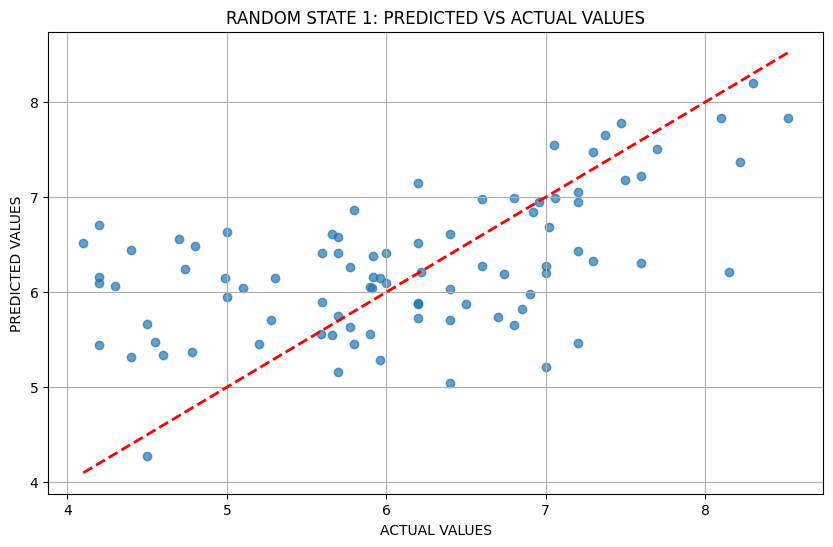

FOR:  0.06 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.6078824198228902
Mean Squared Error: 0.690933770241357
R² Score: 0.4786235313510281


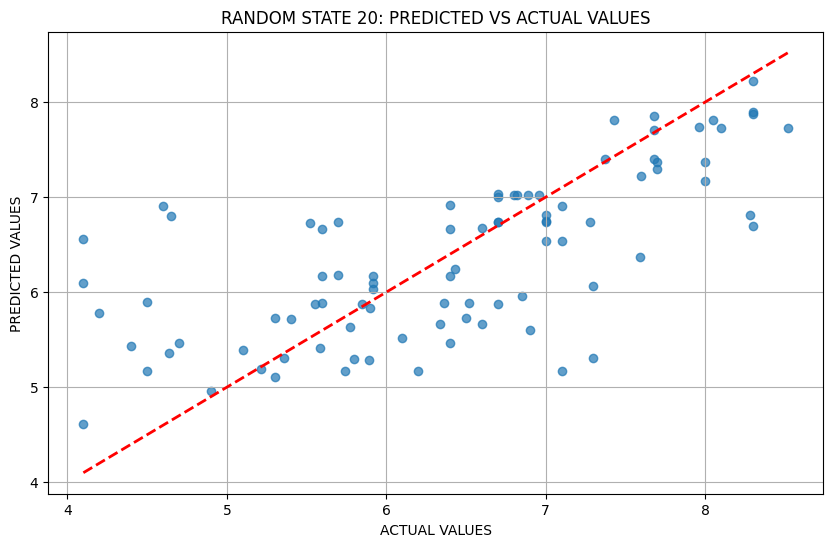

FOR:  0.06 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.6497634908802393
Mean Squared Error: 0.6898925147437577
R² Score: 0.4980655268973837


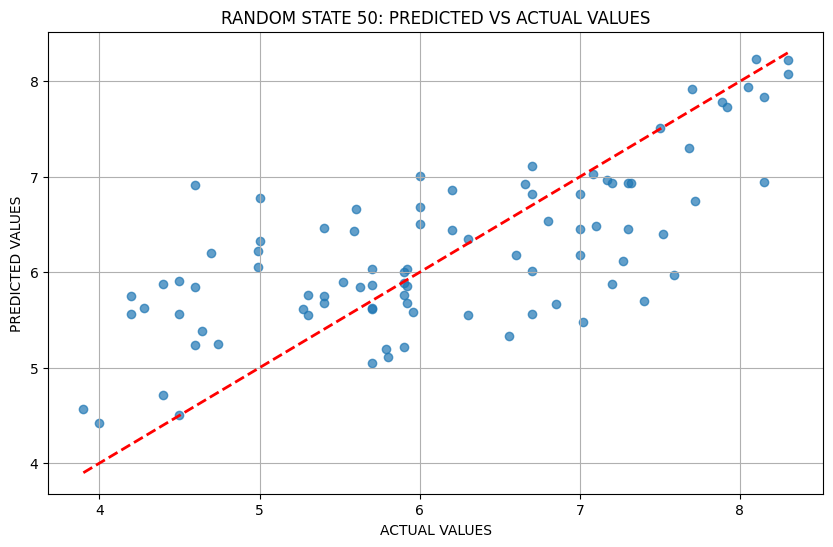

FOR:  0.06 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.7908655336636813
Mean Squared Error: 1.0694396595124225
R² Score: 0.19227837017227778


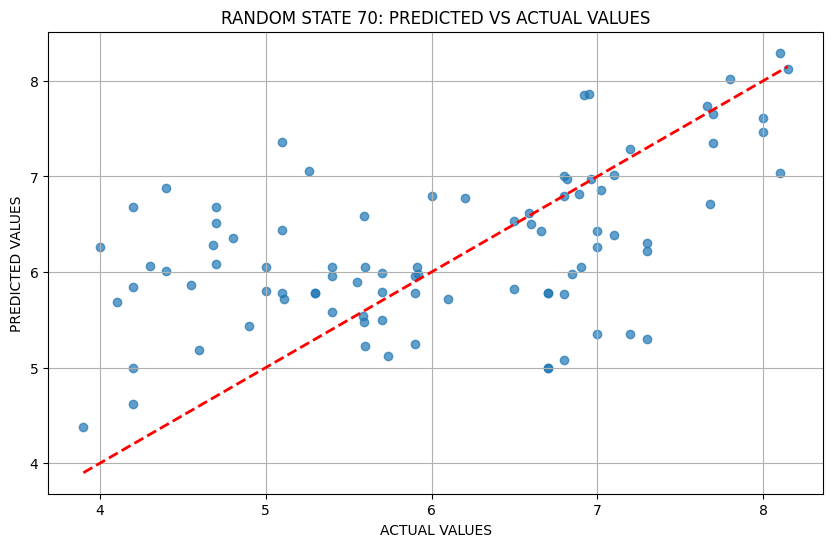

FOR:  0.06 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.646608852786621
Mean Squared Error: 0.7113326057429559
R² Score: 0.4129140228085637


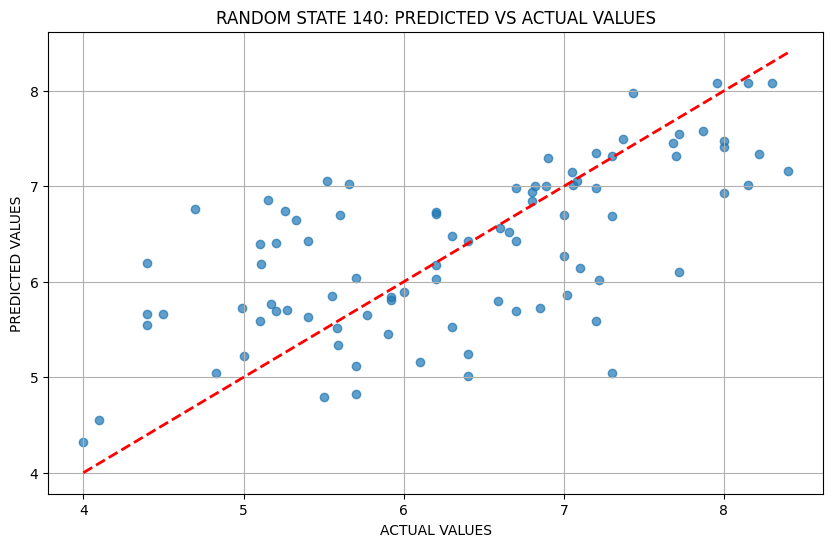

In [ ]:
#FOR pIC50

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt



i='0.06 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF5_pIC50, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }
    # PLOT PRED VS ACTUAL
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('ACTUAL VALUES')
    plt.ylabel('PREDICTED VALUES')
    plt.title(f'RANDOM STATE {j}: PREDICTED VS ACTUAL VALUES')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # DIAG LINE
    plt.grid(True)
    plt.show()

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_006_CUTOFF.loc[len(results_pIC50_006_CUTOFF)] = v


In [ ]:
results_pIC50_006_CUTOFF.to_excel("pIC50_0_06_CUTOFF_RFReg.xlsx")

In [ ]:
#TAKING MIXED FEATURES OF CUTOFF 0.06 THAT WERE TAKEN IN CLASSIFICATION ANALYSIS


#pMIC
EstDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\EState.csv")
SubDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\Substructure.csv")
SubCDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\SubstructureCount.csv")
MACCSDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\MACCS.csv")
AP2D = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\AtomPairs2D.csv")
Pch = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\PubChem.csv")
GraphFP = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\CDKgraphonly.csv")
AP2DC = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\AtomPairs2DCount.csv")


DF1=EstDF[['EStateFP31','EStateFP24']]
DF2=EstDF[['EStateFP31','EStateFP24']]
DF3=EstDF[['EStateFP31','EStateFP24','EStateFP36','EStateFP13']]
DF4=EstDF[['EStateFP31','EStateFP24','EStateFP36','EStateFP13','EStateFP30','EStateFP7']]
a=SubDF[['SubFP88','SubFP1','SubFP23']]
b=SubCDF[['SubFPC302','SubFPC307']]
DF4=pd.concat([DF4,a,b],axis=1)
c=EstDF[['EStateFP38','EStateFP29','EStateFP19','EStateFP51','EStateFP28']]
d=SubCDF[['SubFPC295','SubFPC301']]
DF5_pMIC=pd.concat([DF4,c,d],axis=1)
DF5_pMIC

,EStateFP31,EStateFP24,EStateFP36,EStateFP13,EStateFP30,EStateFP7,SubFP88,SubFP1,SubFP23,SubFPC302,SubFPC307,EStateFP38,EStateFP29,EStateFP19,EStateFP51,EStateFP28,SubFPC295,SubFPC301
0,0,1,1,0,0,1,1,1,0,9.0,17.0,1,1,1,0,0,11.0,7.0
1,0,1,0,0,0,0,1,0,0,4.0,16.0,1,1,0,0,0,8.0,4.0
2,0,1,1,0,0,1,1,1,0,7.0,17.0,1,1,1,0,0,10.0,6.0
3,0,1,1,0,0,1,1,0,0,7.0,17.0,1,1,1,0,0,12.0,6.0
4,0,1,1,0,0,1,1,0,0,8.0,17.0,1,1,1,0,0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0,1,1,0,0,1,1,1,0,13.0,24.0,1,0,1,1,0,15.0,8.0
1077,1,1,1,0,0,1,1,1,0,12.0,24.0,0,0,0,1,0,14.0,8.0
1078,0,1,1,0,0,1,1,1,0,11.0,22.0,0,1,0,1,0,15.0,8.0
1079,0,1,1,0,0,1,1,1,0,11.0,20.0,0,1,0,1,0,17.0,8.0


In [ ]:
FRAME2 = pd.read_excel("pMIC_DATASET.xlsx")
FRAME2

,Unnamed: 0,SMILES,IC50 uM,pIC50,MIC uM,pMIC,Activity,Binding,Class,logS,...,Imini_One_A,Dyes5A,Quinone_D,Ene_Rhod_A,Keto_Keto_Beta_A,Het_Pyridiniums_A,Pyrrole_A,Pyrrole_B,Het_Thio_66_A,Azo_A
0,0,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...,NaN,NaN,NaN,5.030000,Active,Non-covalent,2-Carboxyquinoxalines,-0.2054,...,0,0,0,0,0,0,0,0,0,0
1,1,FC1=CC=C(C=C1)CNC2=NC3=CC=CC=C3N=C2C(O)=O,16,"4,8",75,4.120000,Not Active,Non-covalent,2-Carboxyquinoxalines,1.3320,...,0,0,0,0,0,0,0,0,0,0
2,2,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...,"0,088","7,06",NaN,5.510000,Active,Non-covalent,2-Carboxyquinoxalines,0.5277,...,0,0,0,0,0,0,0,0,0,0
3,3,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OC)...,"0,16","6,8",50,4.300000,Not Active,Non-covalent,2-Carboxyquinoxalines,0.8358,...,0,0,0,0,0,0,0,0,0,0
4,4,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC(OC)=C...,"0,2","6,7",100,4.000000,Not Active,Non-covalent,2-Carboxyquinoxalines,0.8889,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1076,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=CC=C(OC(F...,NaN,NaN,4.719e+04,4.326139,Not Active,Non-covalent,Thiophene-arylamides,0.4251,...,0,0,0,0,0,0,0,0,0,0
1077,1077,CCOC(=O)NC(=O)c1ccsc1NC(=O)c2ccc(cc2)S(=O)(=O)...,NaN,NaN,6962,5.157258,Active,Non-covalent,Thiophene-arylamides,0.9313,...,0,0,0,0,0,0,0,0,0,0
1078,1078,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=CC=CC=N3)...,NaN,NaN,3267,5.485914,Active,Non-covalent,Thiophene-arylamides,1.2000,...,0,0,0,0,0,0,0,0,0,0
1079,1079,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=NC=CS3)=O...,NaN,NaN,1.59e+04,4.798634,Not Active,Non-covalent,Thiophene-arylamides,1.5770,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# DATAFRAME TO SAVE PERFORMANCE METRICS OF THE BEST MODELS
results_pMIC_006_CUTOFF = pd.DataFrame(columns=['Cutoff','Random State', 'Model','MAE', 'MSE', 'R² SCORE'])
results_pMIC_006_CUTOFF

,Cutoff,Random State,Model,MAE,MSE,R² SCORE


FOR:  0.06 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.5561998565596018
Mean Squared Error: 0.5755004668464
R² Score: 0.6340949333370851


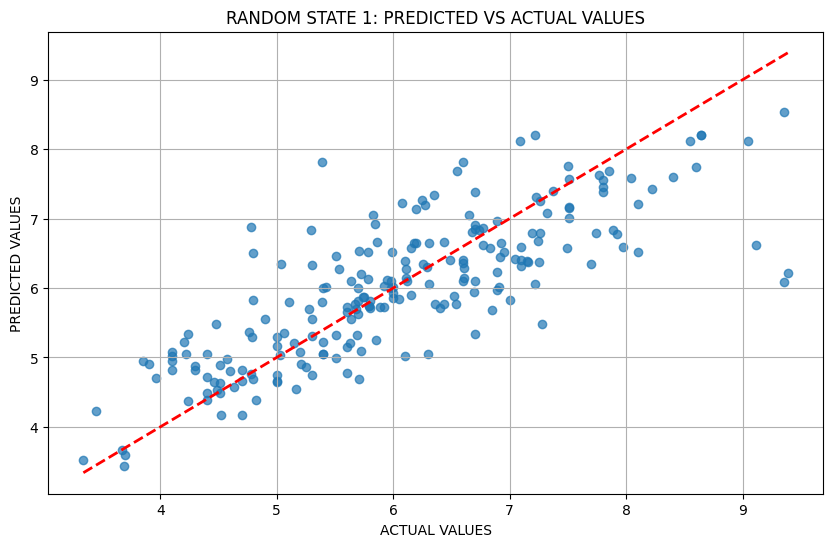

FOR:  0.06 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.5334994067848112
Mean Squared Error: 0.5750471378301111
R² Score: 0.6164076595153241


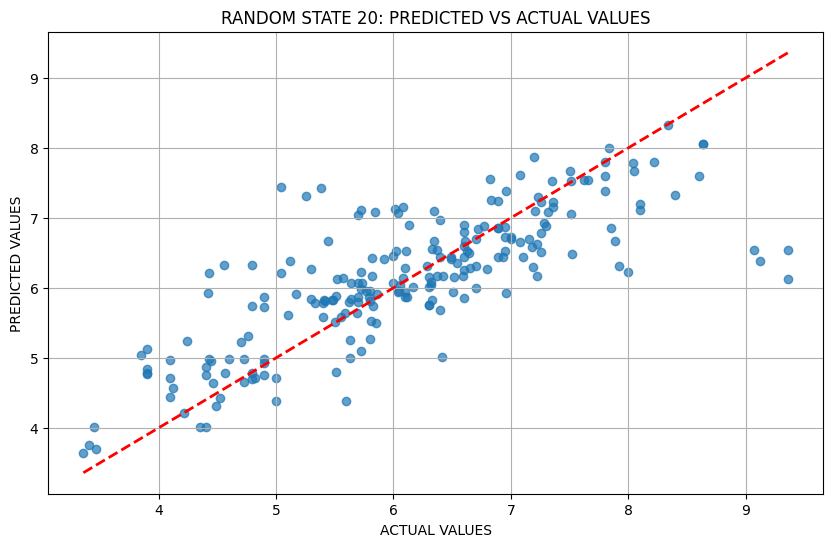

FOR:  0.06 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.576563425891872
Mean Squared Error: 0.5856450790775546
R² Score: 0.5420968004017184


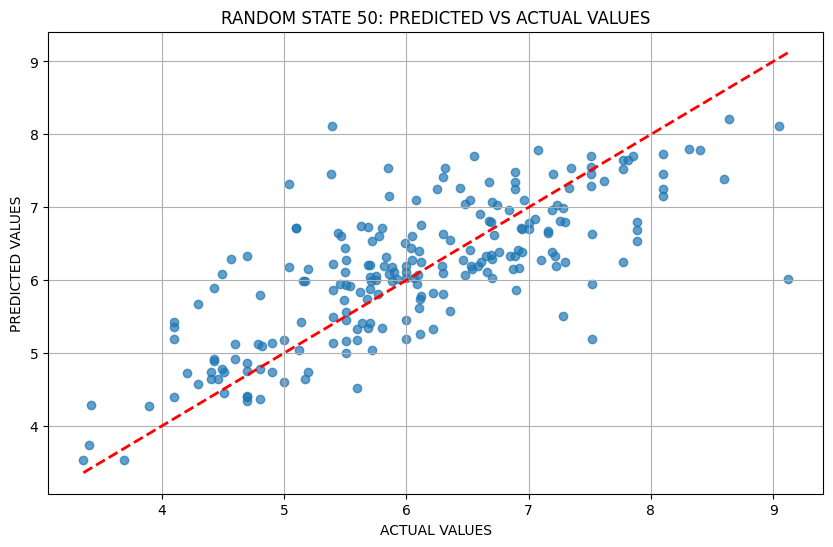

FOR:  0.06 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.579436238588325
Mean Squared Error: 0.6125200845118223
R² Score: 0.5537743318434741


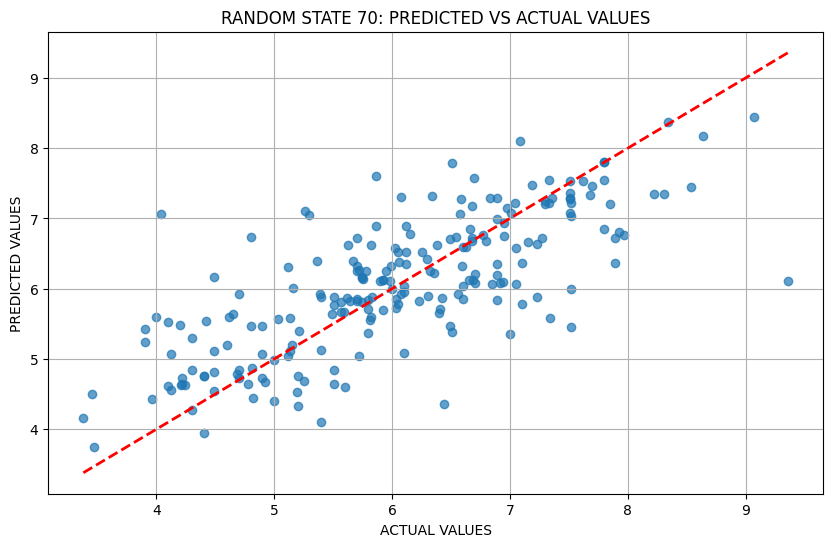

FOR:  0.06 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.5743369660458201
Mean Squared Error: 0.5844594026160318
R² Score: 0.5245602526369184


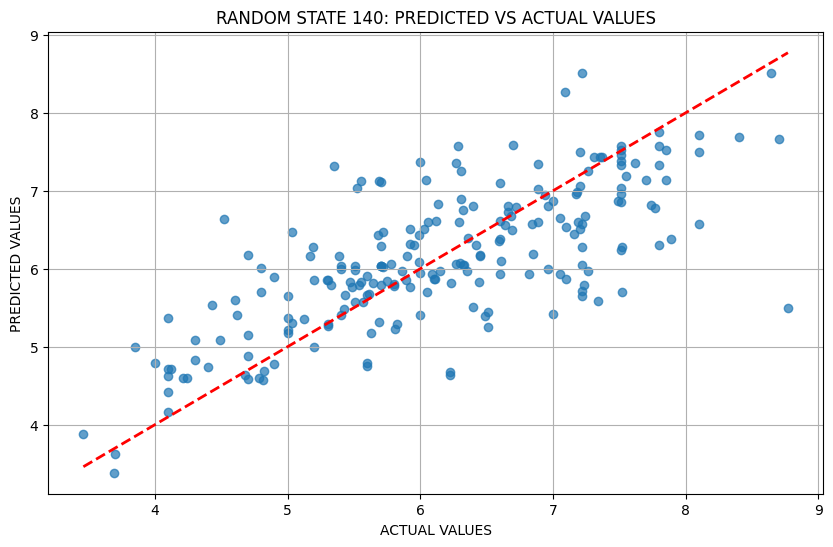

In [ ]:
#FOR pMIC

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt



i='0.06 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF5_pMIC, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_006_CUTOFF.loc[len(results_pMIC_006_CUTOFF)] = v

    # PLOT PRED VS ACTUAL
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('ACTUAL VALUES')
    plt.ylabel('PREDICTED VALUES')
    plt.title(f'RANDOM STATE {j}: PREDICTED VS ACTUAL VALUES')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # DIAG LINE
    plt.grid(True)
    plt.show()


In [ ]:
results_pMIC_006_CUTOFF.to_excel("pMIC_0_06_CUTOFF_RFReg.xlsx")

In [ ]:
# DATAFRAME TO SAVE PERFORMANCE METRICS OF THE BEST MODELS
results_pMIC_DIFF_CUTOFF = pd.DataFrame(columns=['Cutoff','Random State', 'Model','MAE', 'MSE', 'R² SCORE'])
results_pMIC_DIFF_CUTOFF

,Cutoff,Random State,Model,MAE,MSE,R² SCORE


In [ ]:

#pMIC
EstDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\EState.csv")
SubDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\Substructure.csv")
SubCDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\SubstructureCount.csv")
MACCSDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\MACCS.csv")
AP2D = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\AtomPairs2D.csv")
Pch = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\PubChem.csv")
GraphFP = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\CDKgraphonly.csv")
AP2DC = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\AtomPairs2DCount.csv")

DF1=EstDF[['EStateFP31','EStateFP24']]
DF2=EstDF[['EStateFP31','EStateFP24']]
DF3=EstDF[['EStateFP31','EStateFP24','EStateFP36','EStateFP13']]
DF4=EstDF[['EStateFP31','EStateFP24','EStateFP36','EStateFP13','EStateFP30','EStateFP7']]
a=SubDF[['SubFP88','SubFP1','SubFP23']]
b=SubCDF[['SubFPC302','SubFPC307']]
DF4=pd.concat([DF4,a,b],axis=1)
c=EstDF[['EStateFP38','EStateFP29','EStateFP19','EStateFP51','EStateFP28']]
d=SubCDF[['SubFPC295','SubFPC301']]
DF5=pd.concat([DF4,c,d],axis=1)
e=SubDF[['SubFP172','SubFP96','SubFP2','SubFP3','SubFP137']]
f=SubCDF[['SubFPC300']]
g=EstDF[['EStateFP18']]
DF6=pd.concat([DF5,e,f,g],axis=1)
h=SubDF[['SubFP100','SubFP143','SubFP135']]
DF7=pd.concat([DF6,h],axis=1)
i=SubDF[['SubFP9','SubFP181','SubFP188','SubFP294','SubFP184']]
j=SubCDF[['SubFPC274','SubFPC2','SubFPC287','SubFPC275']]
k=AP2D[['AD2D170','AD2D14']]
l=MACCSDF[['MACCSFP66']]
DF8=pd.concat([DF7,i,j,k,l],axis=1)
m=SubDF[['SubFP297','SubFP299']]
n=SubCDF[['SubFPC88','SubFPC1','SubFPC9','SubFPC188']]
o=MACCSDF[['MACCSFP119','MACCSFP90']]
p=AP2D[['AD2D258','AD2D481','AD2D560','AD2D325','AD2D482','AD2D706','AD2D648','AD2D628','AD2D248']]
DF9=pd.concat([DF8,m,n,o,p],axis=1)
q=SubCDF[['SubFPC184','SubFPC137','SubFPC135','SubFPC96','SubFPC299','SubFPC172','SubFPC181','SubFPC297','SubFPC23','SubFPC294','SubFPC296','SubFPC26','SubFPC18','SubFPC143','SubFPC3']]
r=Pch[['PubchemFP2','PubchemFP696','PubchemFP374','PubchemFP528','PubchemFP800','PubchemFP346']]
s=MACCSDF[[
    "MACCSFP155",
    "MACCSFP79",
    "MACCSFP151",
    "MACCSFP95",
    "MACCSFP93",
    "MACCSFP140",
    "MACCSFP105",
    "MACCSFP132",
    "MACCSFP89",
    "MACCSFP62",
    "MACCSFP149",
    "MACCSFP107",
    "MACCSFP108",
    "MACCSFP42",
    "MACCSFP91",
    "MACCSFP150",
    "MACCSFP144",
    "MACCSFP80",
    "MACCSFP87",
    "MACCSFP160",
    "MACCSFP152",
    "MACCSFP134",
    "MACCSFP126",
    "MACCSFP111"
]
]
t=AP2D[[
    "AD2D169",
    "AD2D91",
    "AD2D570",
    "AD2D327",
    "AD2D638",
    "AD2D403",
    "AD2D247",
    "AD2D558",
    "AD2D559",
    "AD2D716",
    "AD2D637",
    "AD2D102",
    "AD2D414",
    "AD2D569",
    "AD2D405"
]]
u=GraphFP[['GraphFP188']]
v=AP2DC[[
    "APC2D5_C_C",
    "APC2D6_C_N",
    "APC2D6_C_O",
    "APC2D10_C_C",
    "APC2D8_C_C",
    "APC2D9_C_C",
    "APC2D4_C_N",
    "APC2D7_C_C",
    "APC2D5_N_N",
    "APC2D3_C_C",
    "APC2D3_C_N",
    "APC2D5_C_N",
    "APC2D4_C_C",
    "APC2D2_C_C",
    "APC2D7_C_O",
    "APC2D6_C_C",
    "APC2D8_C_O",
    "APC2D7_C_N"
]
]
DF10=pd.concat([DF9,q,r,s,t,u,v],axis=1)


In [ ]:
#FOR pMIC
#0.1 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



i='0.1 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF1, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_DIFF_CUTOFF.loc[len(results_pMIC_DIFF_CUTOFF)] = v


FOR:  0.1 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.7978637475056767
Mean Squared Error: 0.9915920767874552
R² Score: 0.36954253582530916
FOR:  0.1 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.8312320591299658
Mean Squared Error: 1.0206804731652348
R² Score: 0.3191424044542779
FOR:  0.1 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.792823720027229
Mean Squared Error: 0.9371159574995073
R² Score: 0.26728933501922825
FOR:  0.1 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.7976375308567819
Mean Squared Error: 0.9764555535652512
R² Score: 0.2886444986337511
FOR:  0.1 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.8027622906650341
Mean Squared Error: 0.9341873348933605
R² Score: 0.24006733657892787


In [ ]:
#FOR pMIC
#0.09 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.09 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF2, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_DIFF_CUTOFF.loc[len(results_pMIC_DIFF_CUTOFF)] = v


FOR:  0.09 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.7978637475056767
Mean Squared Error: 0.9915920767874552
R² Score: 0.36954253582530916
FOR:  0.09 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.8312320591299658
Mean Squared Error: 1.0206804731652348
R² Score: 0.3191424044542779
FOR:  0.09 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.792823720027229
Mean Squared Error: 0.9371159574995073
R² Score: 0.26728933501922825
FOR:  0.09 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.7976375308567819
Mean Squared Error: 0.9764555535652512
R² Score: 0.2886444986337511
FOR:  0.09 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.8027622906650341
Mean Squared Error: 0.9341873348933605
R² Score: 0.24006733657892787


In [ ]:
#FOR pMIC
#0.08 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.08 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF3, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_DIFF_CUTOFF.loc[len(results_pMIC_DIFF_CUTOFF)] = v


FOR:  0.08 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.7736719911415441
Mean Squared Error: 0.9259224233279882
R² Score: 0.41129551486021587
FOR:  0.08 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.8012911623032901
Mean Squared Error: 0.9672279394108964
R² Score: 0.35479858145053733
FOR:  0.08 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.7615654516963904
Mean Squared Error: 0.8743272774918809
R² Score: 0.3163824436291912
FOR:  0.08 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.8114709323952936
Mean Squared Error: 1.034909598971561
R² Score: 0.24606026976120532
FOR:  0.08 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.7803002224386087
Mean Squared Error: 0.9121587657904491
R² Score: 0.2579868999945907


In [ ]:
#FOR pMIC
#0.07 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.07 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF4, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_DIFF_CUTOFF.loc[len(results_pMIC_DIFF_CUTOFF)] = v


FOR:  0.07 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.601745949337503
Mean Squared Error: 0.6593357305400993
R² Score: 0.5807922002938929
FOR:  0.07 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.628553931689432
Mean Squared Error: 0.7352133642662523
R² Score: 0.509566787483388
FOR:  0.07 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.6147018384100654
Mean Squared Error: 0.6767925728184567
R² Score: 0.4708305497144204
FOR:  0.07 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.661670966653009
Mean Squared Error: 0.7668409862205343
R² Score: 0.44135034899502534
FOR:  0.07 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.6703147884290181
Mean Squared Error: 0.8373961391085641
R² Score: 0.3188039972689888


In [ ]:
#FOR pMIC
#0.06 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.06 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF5, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_DIFF_CUTOFF.loc[len(results_pMIC_DIFF_CUTOFF)] = v


FOR:  0.06 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.5561998565596018
Mean Squared Error: 0.5755004668464
R² Score: 0.6340949333370851
FOR:  0.06 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.5334994067848112
Mean Squared Error: 0.5750471378301111
R² Score: 0.6164076595153241
FOR:  0.06 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.576563425891872
Mean Squared Error: 0.5856450790775546
R² Score: 0.5420968004017184
FOR:  0.06 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.579436238588325
Mean Squared Error: 0.6125200845118223
R² Score: 0.5537743318434741
FOR:  0.06 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.5743369660458201
Mean Squared Error: 0.5844594026160318
R² Score: 0.5245602526369184


In [ ]:
#FOR pMIC
#0.05 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.05 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF6, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_DIFF_CUTOFF.loc[len(results_pMIC_DIFF_CUTOFF)] = v


FOR:  0.05 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.5608571655043251
Mean Squared Error: 0.5718684370168992
R² Score: 0.6364041897034052
FOR:  0.05 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.5442770605751053
Mean Squared Error: 0.5737296759095303
R² Score: 0.617286488864031
FOR:  0.05 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.5374785252516382
Mean Squared Error: 0.5150877301972748
R² Score: 0.5972640628985554
FOR:  0.05 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.5560868536060192
Mean Squared Error: 0.568600269019145
R² Score: 0.5857702606449778
FOR:  0.05 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.559006043305256
Mean Squared Error: 0.5448453313298941
R² Score: 0.5567850811878892


In [ ]:
#FOR pMIC
#0.04 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.04 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF7, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_DIFF_CUTOFF.loc[len(results_pMIC_DIFF_CUTOFF)] = v


FOR:  0.04 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.562237518674144
Mean Squared Error: 0.5672875714212315
R² Score: 0.6393167189326889
FOR:  0.04 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.5298263221344838
Mean Squared Error: 0.5543321117883473
R² Score: 0.6302258751011718
FOR:  0.04 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.5278538914816876
Mean Squared Error: 0.5006506630811761
R² Score: 0.608552092904185
FOR:  0.04 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.5568456462755436
Mean Squared Error: 0.5744162736582856
R² Score: 0.5815332558157069
FOR:  0.04 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.5671095704384683
Mean Squared Error: 0.550200109773763
R² Score: 0.5524291336248197


In [ ]:
#FOR pMIC
#0.03 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.03 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF8, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_DIFF_CUTOFF.loc[len(results_pMIC_DIFF_CUTOFF)] = v


FOR:  0.03 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.5443112252751009
Mean Squared Error: 0.5093235694337018
R² Score: 0.6761704197255279
FOR:  0.03 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.5188455915780928
Mean Squared Error: 0.5371530906313348
R² Score: 0.641685354680046
FOR:  0.03 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.511349471400262
Mean Squared Error: 0.48241119008080136
R² Score: 0.6228131416933477
FOR:  0.03 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.520515534190684
Mean Squared Error: 0.4883887667245811
R² Score: 0.6442049668860915
FOR:  0.03 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.548305128185166
Mean Squared Error: 0.5086939116232724
R² Score: 0.5861931491823479


In [ ]:
#FOR pMIC
#0.02 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.02 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF9, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_DIFF_CUTOFF.loc[len(results_pMIC_DIFF_CUTOFF)] = v


FOR:  0.02 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.531958216730023
Mean Squared Error: 0.4589599923484342
R² Score: 0.7081917456711873
FOR:  0.02 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.46847108863569625
Mean Squared Error: 0.4002533616643577
R² Score: 0.7330060203985402
FOR:  0.02 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.47959246634328256
Mean Squared Error: 0.39094742471520966
R² Score: 0.6943266783121105
FOR:  0.02 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.49312551080809996
Mean Squared Error: 0.4404287260477713
R² Score: 0.6791442313069149
FOR:  0.02 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.48929915989841055
Mean Squared Error: 0.3938915037798926
R² Score: 0.6795813768974353


In [ ]:
#FOR pMIC
#0.01 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.01 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF10, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_DIFF_CUTOFF.loc[len(results_pMIC_DIFF_CUTOFF)] = v


FOR:  0.01 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.4857885829914211
Mean Squared Error: 0.3950713976224647
R² Score: 0.7488123217765498
FOR:  0.01 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.47398607966840384
Mean Squared Error: 0.39321188873248786
R² Score: 0.7377031224354058
FOR:  0.01 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.4787163228533399
Mean Squared Error: 0.36539092421490976
R² Score: 0.7143087523834145
FOR:  0.01 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.5095803380947074
Mean Squared Error: 0.47044328851943684
R² Score: 0.6572783879949863
FOR:  0.01 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.4777400175759559
Mean Squared Error: 0.36833774692663207
R² Score: 0.70036857212111


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming DF10 and FRAME2 are defined and contain the data
X = DF10  # Feature matrix
y = FRAME2['pMIC']  # Target variable

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Deep Learning Model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Predicting and Evaluating
y_pred = model.predict(X_test).flatten()
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Store the results
v = {
    'Cutoff': '0.01 CUTOFF',
    'Model': 'Deep Learning Regression',
    'MAE': mae,
    'MSE': mse,
    'R² SCORE': r2
}

# # Assuming results_pMIC_DIFF_CUTOFF DataFrame exists
# results_pMIC_DIFF_CUTOFF = pd.DataFrame([v])
# print(results_pMIC_DIFF_CUTOFF)




Epoch 1/100

22/22 [==============================] - 1s 13ms/step - loss: 21.8518 - val_loss: 2.7727
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 2.2898 - val_loss: 1.5798
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0841 - val_loss: 0.9403
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7159 - val_loss: 0.7895
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6080 - val_loss: 0.7004
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5115 - val_loss: 0.6945
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4617 - val_loss: 0.7151
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4270 - val_loss: 0.6616
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3748 - val_loss: 0.6464
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 0.3626 - val_loss: 0.6243
Epoc

In [ ]:

#pIC50
EstDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\EState.csv")
SubDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\Substructure.csv")
SubCDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\SubstructureCount.csv")
MACCSDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\MACCS.csv")
AP2D=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\AtomPairs2D.csv")
Pch=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\PubChem.csv")
GraphFP=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\CDKgraphonly.csv")
AP2DC=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\AtomPairs2DCount.csv")

DF1=EstDF[['EStateFP31','EStateFP24']]
DF2=EstDF[['EStateFP31','EStateFP24']]
DF3=EstDF[['EStateFP31','EStateFP24','EStateFP36','EStateFP13']]
DF4=EstDF[['EStateFP31','EStateFP24','EStateFP36','EStateFP13','EStateFP30','EStateFP7']]
a=SubDF[['SubFP88','SubFP1','SubFP23']]
b=SubCDF[['SubFPC302','SubFPC307']]
DF4=pd.concat([DF4,a,b],axis=1)
c=EstDF[['EStateFP38','EStateFP29','EStateFP19','EStateFP51','EStateFP28']]
d=SubCDF[['SubFPC295','SubFPC301']]
DF5=pd.concat([DF4,c,d],axis=1)
e=SubDF[['SubFP172','SubFP96','SubFP2','SubFP3','SubFP137']]
f=SubCDF[['SubFPC300']]
g=EstDF[['EStateFP18']]
DF6=pd.concat([DF5,e,f,g],axis=1)
h=SubDF[['SubFP100','SubFP143','SubFP135']]
DF7=pd.concat([DF6,h],axis=1)
i=SubDF[['SubFP9','SubFP181','SubFP188','SubFP294','SubFP184']]
j=SubCDF[['SubFPC274','SubFPC2','SubFPC287','SubFPC275']]
k=AP2D[['AD2D170','AD2D14']]
l=MACCSDF[['MACCSFP66']]
DF8=pd.concat([DF7,i,j,k,l],axis=1)
m=SubDF[['SubFP297','SubFP299']]
n=SubCDF[['SubFPC88','SubFPC1','SubFPC9','SubFPC188']]
o=MACCSDF[['MACCSFP119','MACCSFP90']]
p=AP2D[['AD2D258','AD2D481','AD2D560','AD2D325','AD2D482','AD2D706','AD2D648','AD2D628','AD2D248']]
DF9=pd.concat([DF8,m,n,o,p],axis=1)
q=SubCDF[['SubFPC184','SubFPC137','SubFPC135','SubFPC96','SubFPC299','SubFPC172','SubFPC181','SubFPC297','SubFPC23','SubFPC294','SubFPC296','SubFPC26','SubFPC18','SubFPC143','SubFPC3']]
r=Pch[['PubchemFP2','PubchemFP696','PubchemFP374','PubchemFP528','PubchemFP800','PubchemFP346']]
s=MACCSDF[[
    "MACCSFP155",
    "MACCSFP79",
    "MACCSFP151",
    "MACCSFP95",
    "MACCSFP93",
    "MACCSFP140",
    "MACCSFP105",
    "MACCSFP132",
    "MACCSFP89",
    "MACCSFP62",
    "MACCSFP149",
    "MACCSFP107",
    "MACCSFP108",
    "MACCSFP42",
    "MACCSFP91",
    "MACCSFP150",
    "MACCSFP144",
    "MACCSFP80",
    "MACCSFP87",
    "MACCSFP160",
    "MACCSFP152",
    "MACCSFP134",
    "MACCSFP126",
    "MACCSFP111"
]
]
t=AP2D[[
    "AD2D169",
    "AD2D91",
    "AD2D570",
    "AD2D327",
    "AD2D638",
    "AD2D403",
    "AD2D247",
    "AD2D558",
    "AD2D559",
    "AD2D716",
    "AD2D637",
    "AD2D102",
    "AD2D414",
    "AD2D569",
    "AD2D405"
]]
u=GraphFP[['GraphFP188']]
v=AP2DC[[
    "APC2D5_C_C",
    "APC2D6_C_N",
    "APC2D6_C_O",
    "APC2D10_C_C",
    "APC2D8_C_C",
    "APC2D9_C_C",
    "APC2D4_C_N",
    "APC2D7_C_C",
    "APC2D5_N_N",
    "APC2D3_C_C",
    "APC2D3_C_N",
    "APC2D5_C_N",
    "APC2D4_C_C",
    "APC2D2_C_C",
    "APC2D7_C_O",
    "APC2D6_C_C",
    "APC2D8_C_O",
    "APC2D7_C_N"
]
]
DF10=pd.concat([DF9,q,r,s,t,u,v],axis=1)


In [ ]:
DF1

,EStateFP31,EStateFP24
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
439,1,0
440,0,0
441,0,0
442,0,0


In [ ]:
# DATAFRAME TO SAVE PERFORMANCE METRICS OF THE BEST MODELS
results_pIC50_DIFF_CUTOFF = pd.DataFrame(columns=['Cutoff','Random State', 'Model','MAE', 'MSE', 'R² SCORE'])
results_pIC50_DIFF_CUTOFF

,Cutoff,Random State,Model,MAE,MSE,R² SCORE


In [ ]:
#FOR pIC50
#0.1 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.1 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF1, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_DIFF_CUTOFF.loc[len(results_pIC50_DIFF_CUTOFF)] = v


FOR:  0.1 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.884228351340672
Mean Squared Error: 1.209427559736014
R² Score: 0.0018355731090672345
FOR:  0.1 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.9477351684309947
Mean Squared Error: 1.308396526235274
R² Score: 0.012688060965909465
FOR:  0.1 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 1.0032596522250399
Mean Squared Error: 1.3867650930267013
R² Score: -0.008947323546470098
FOR:  0.1 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 1.0291184459861902
Mean Squared Error: 1.4900500987777034
R² Score: -0.12539841177986988
FOR:  0.1 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.925606024398668
Mean Squared Error: 1.2008006667036446
R² Score: 0.008940083538665378


In [ ]:
#FOR pIC50
#0.09 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.09 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF2, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_DIFF_CUTOFF.loc[len(results_pIC50_DIFF_CUTOFF)] = v


FOR:  0.09 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.884228351340672
Mean Squared Error: 1.209427559736014
R² Score: 0.0018355731090672345
FOR:  0.09 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.9477351684309947
Mean Squared Error: 1.308396526235274
R² Score: 0.012688060965909465
FOR:  0.09 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 1.0032596522250399
Mean Squared Error: 1.3867650930267013
R² Score: -0.008947323546470098
FOR:  0.09 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 1.0291184459861902
Mean Squared Error: 1.4900500987777034
R² Score: -0.12539841177986988
FOR:  0.09 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.925606024398668
Mean Squared Error: 1.2008006667036446
R² Score: 0.008940083538665378


In [ ]:
#FOR pIC50
#0.08 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.08 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF3, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_DIFF_CUTOFF.loc[len(results_pIC50_DIFF_CUTOFF)] = v


FOR:  0.08 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.8587050525167568
Mean Squared Error: 1.1376166596224164
R² Score: 0.06110252579208442
FOR:  0.08 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.9808686185406201
Mean Squared Error: 1.3205043443292952
R² Score: 0.00355153918510287
FOR:  0.08 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.9776944138189685
Mean Squared Error: 1.3182558680639178
R² Score: 0.040896878266816095
FOR:  0.08 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.9677690753276552
Mean Squared Error: 1.3210492772753513
R² Score: 0.0022437770728787054
FOR:  0.08 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.9121556420236626
Mean Squared Error: 1.1334744132095373
R² Score: 0.0645066342690972


In [ ]:
#FOR pIC50
#0.07 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.07 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF4, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_DIFF_CUTOFF.loc[len(results_pIC50_DIFF_CUTOFF)] = v


FOR:  0.07 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.8269063394808073
Mean Squared Error: 1.0184507977378596
R² Score: 0.15945246273161107
FOR:  0.07 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.714212468334779
Mean Squared Error: 0.8368534935021408
R² Score: 0.36851296316535853
FOR:  0.07 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.6990752528135892
Mean Squared Error: 0.7862340180654636
R² Score: 0.4279718229156042
FOR:  0.07 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.8692033827047654
Mean Squared Error: 1.1771755464775355
R² Score: 0.11090808860812607
FOR:  0.07 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.7476494053135784
Mean Squared Error: 0.9241553580866194
R² Score: 0.23726447079941482


In [ ]:
#FOR pIC50
#0.06 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.06 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF5, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_DIFF_CUTOFF.loc[len(results_pIC50_DIFF_CUTOFF)] = v


FOR:  0.06 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.7297855505308839
Mean Squared Error: 0.8904810296910455
R² Score: 0.2650684371267167
FOR:  0.06 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.6078824198228902
Mean Squared Error: 0.690933770241357
R² Score: 0.4786235313510281
FOR:  0.06 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.6497634908802393
Mean Squared Error: 0.6898925147437577
R² Score: 0.4980655268973837
FOR:  0.06 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.7908655336636813
Mean Squared Error: 1.0694396595124225
R² Score: 0.19227837017227778
FOR:  0.06 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.646608852786621
Mean Squared Error: 0.7113326057429559
R² Score: 0.4129140228085637


In [ ]:
#FOR pIC50
#0.05 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.05 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF6, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_DIFF_CUTOFF.loc[len(results_pIC50_DIFF_CUTOFF)] = v


FOR:  0.05 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.709841416340018
Mean Squared Error: 0.858560291753393
R² Score: 0.2914132519384671
FOR:  0.05 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.6200713141183302
Mean Squared Error: 0.7059881957472497
R² Score: 0.4672635088049315
FOR:  0.05 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.6414850599244347
Mean Squared Error: 0.6953878955147517
R² Score: 0.4940673373347507
FOR:  0.05 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.7874129783876089
Mean Squared Error: 1.0502089428388255
R² Score: 0.20680286033513062
FOR:  0.05 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.6628275839459992
Mean Squared Error: 0.7406785457027029
R² Score: 0.38869386236776016


In [ ]:
#FOR pIC50
#0.04 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.04 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF7, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_DIFF_CUTOFF.loc[len(results_pIC50_DIFF_CUTOFF)] = v


FOR:  0.04 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.7055790250189987
Mean Squared Error: 0.8367757566700804
R² Score: 0.30939245854863096
FOR:  0.04 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.608167477344749
Mean Squared Error: 0.6762959679324393
R² Score: 0.4896691713317448
FOR:  0.04 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.6418571567378878
Mean Squared Error: 0.68423271940796
R² Score: 0.5021833370330646
FOR:  0.04 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.7773470557425056
Mean Squared Error: 1.0592977482497283
R² Score: 0.19993830780579158
FOR:  0.04 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.6480991537157768
Mean Squared Error: 0.7198344941326361
R² Score: 0.4058971372996888


In [ ]:
#FOR pIC50
#0.03 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.03 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF8, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_DIFF_CUTOFF.loc[len(results_pIC50_DIFF_CUTOFF)] = v


FOR:  0.03 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.7161067857914918
Mean Squared Error: 0.8655777728576544
R² Score: 0.2856215863291751
FOR:  0.03 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.5979882461497121
Mean Squared Error: 0.664114788963913
R² Score: 0.498861050999709
FOR:  0.03 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.62227131398329
Mean Squared Error: 0.6541945827817076
R² Score: 0.5240377215324854
FOR:  0.03 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.7431676753441424
Mean Squared Error: 0.9745370386554681
R² Score: 0.2639559995847216
FOR:  0.03 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.6225004953626035
Mean Squared Error: 0.6819610220308039
R² Score: 0.4371553478737892


In [ ]:
#FOR pIC50
#0.02 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.02 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF9, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_DIFF_CUTOFF.loc[len(results_pIC50_DIFF_CUTOFF)] = v


FOR:  0.02 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.6955313882390443
Mean Squared Error: 0.8437995039451334
R² Score: 0.303595621344954
FOR:  0.02 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.6061288187166202
Mean Squared Error: 0.6680738604209642
R² Score: 0.4958735480228532
FOR:  0.02 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.6250753515259652
Mean Squared Error: 0.6746773201458315
R² Score: 0.509135411727922
FOR:  0.02 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.7207848817139261
Mean Squared Error: 0.9028969504426508
R² Score: 0.31806400679911695
FOR:  0.02 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.6140233370739209
Mean Squared Error: 0.6536882875391261
R² Score: 0.4604897568730564


In [ ]:
#FOR pIC50
#0.01 CUTOFF

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

i='0.01 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME1['pIC50'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF10, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("FOR: ",i)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Cutoff': i, 'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pIC50_DIFF_CUTOFF.loc[len(results_pIC50_DIFF_CUTOFF)] = v


FOR:  0.01 CUTOFF
RANDOM STATE:  1
Mean Absolute Error: 0.6658259754397342
Mean Squared Error: 0.7987060702727481
R² Score: 0.34081212184206966
FOR:  0.01 CUTOFF
RANDOM STATE:  20
Mean Absolute Error: 0.5982904948716746
Mean Squared Error: 0.67192435603557
R² Score: 0.4929679760381602
FOR:  0.01 CUTOFF
RANDOM STATE:  50
Mean Absolute Error: 0.6427009310488788
Mean Squared Error: 0.6973002952634149
R² Score: 0.49267596209919917
FOR:  0.01 CUTOFF
RANDOM STATE:  70
Mean Absolute Error: 0.7098164708540186
Mean Squared Error: 0.8713802803031016
R² Score: 0.34186777725538153
FOR:  0.01 CUTOFF
RANDOM STATE:  140
Mean Absolute Error: 0.6220603538304171
Mean Squared Error: 0.6220315728292537
R² Score: 0.48661707500815654


In [ ]:
results_pMIC_DIFF_CUTOFF.to_excel("pMIC_DIFF_CUTOFF_RFReg.xlsx")

In [ ]:
results_pIC50_DIFF_CUTOFF.to_excel("pIC50_DIFF_CUTOFF_RFReg.xlsx")

In [ ]:

#pMIC
EstDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\EState.csv")
SubDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\Substructure.csv")
SubCDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\SubstructureCount.csv")
MACCSDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\MACCS.csv")
AP2D = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\AtomPairs2D.csv")
Pch = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\PubChem.csv")
GraphFP = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\CDKgraphonly.csv")
AP2DC = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\AtomPairs2DCount.csv")
CDKEXT = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\CDKextended.csv")
CDK = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\CDK.csv")

DF_ALLFTR = pd.concat([EstDF, SubDF, SubCDF, MACCSDF, AP2D, Pch, GraphFP, AP2DC, CDKEXT, CDK], axis=1)


In [ ]:
CDK

,Name,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,...,FP1015,FP1016,FP1017,FP1018,FP1019,FP1020,FP1021,FP1022,FP1023,FP1024
0,AUTOGEN_molecule_pMIC_1,0,0,0,0,1,0,0,0,0,...,1,1,1,0,0,1,0,0,0,1
1,AUTOGEN_molecule_pMIC_2,0,0,0,0,1,1,0,0,0,...,1,1,1,0,0,0,0,0,0,1
2,AUTOGEN_molecule_pMIC_3,0,0,0,0,1,0,0,0,0,...,1,1,1,0,0,1,0,0,0,1
3,AUTOGEN_molecule_pMIC_4,0,0,0,0,1,1,0,0,0,...,1,1,1,0,0,1,0,1,0,1
4,AUTOGEN_molecule_pMIC_5,0,0,0,0,1,1,0,0,0,...,1,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,AUTOGEN_molecule_pMIC_1077,0,1,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1077,AUTOGEN_molecule_pMIC_1078,0,1,1,0,1,0,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1078,AUTOGEN_molecule_pMIC_1079,0,1,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1079,AUTOGEN_molecule_pMIC_1080,0,1,0,0,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
# DATAFRAME TO SAVE PERFORMANCE METRICS OF THE BEST MODELS
results_pMIC_ALLFTR = pd.DataFrame(columns=['Random State', 'Model','MAE', 'MSE', 'R² SCORE'])
results_pMIC_ALLFTR

,Random State,Model,MAE,MSE,R² SCORE


In [ ]:
DF_ALLFTR = DF_ALLFTR.drop(columns=['Name'])


In [ ]:
DF_ALLFTR

,EStateFP1,EStateFP2,EStateFP3,EStateFP4,EStateFP5,EStateFP6,EStateFP7,EStateFP8,EStateFP9,EStateFP10,...,FP1015,FP1016,FP1017,FP1018,FP1019,FP1020,FP1021,FP1022,FP1023,FP1024
0,0,0,0,0,0,0,1,0,1,0,...,1,1,1,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,1,0,...,1,1,1,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,1,0,...,1,1,1,0,0,1,0,1,0,1
4,0,0,0,0,0,0,1,0,1,0,...,1,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1077,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1078,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1079,0,0,0,0,0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
#FOR pMIC
#ALL FTR

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

RANDOMSTATE=[1,20,50,70,140]
y1 = FRAME2['pMIC'].values

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF_ALLFTR, y1, test_size=0.2,
                                                        random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("RANDOM STATE: ",j)
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    v={'Random State': j, 'Model': 'Random Forest Regression','MAE': mae, 'MSE': mse,
                               'R² SCORE': r2, }

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    results_pMIC_ALLFTR.loc[len(results_pMIC_ALLFTR)] = v


RANDOM STATE:  1
Mean Absolute Error: 0.5035195873194074
Mean Squared Error: 0.4118160572133784
R² Score: 0.7381660128040561
RANDOM STATE:  20
Mean Absolute Error: 0.48692614413076846
Mean Squared Error: 0.39308183972339816
R² Score: 0.7377898732432833
RANDOM STATE:  50
Mean Absolute Error: 0.4479795839084792
Mean Squared Error: 0.31525745214526657
R² Score: 0.7535070280759534
RANDOM STATE:  70
Mean Absolute Error: 0.4866027464360869
Mean Squared Error: 0.3918987241572273
R² Score: 0.7144987169259533
RANDOM STATE:  140
Mean Absolute Error: 0.4666469418121262
Mean Squared Error: 0.353746352030526
R² Score: 0.7122382230703945


In [ ]:
results_pMIC_ALLFTR.to_excel('ALL_FTR_RG.xlsx')

In [ ]:
#pIC50

EstDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\EState.csv")
SubDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\Substructure.csv")
SubCDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\SubstructureCount.csv")
MACCSDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\MACCS.csv")
AP2D = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\AtomPairs2D.csv")
Pch = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\PubChem.csv")
GraphFP = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\CDKgraphonly.csv")
AP2DC = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\AtomPairs2DCount.csv")
CDKEXT = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\CDKextended.csv")
CDK = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\CDK.csv")

DF_ALLFTR = pd.concat([EstDF, SubDF, SubCDF, MACCSDF, AP2D, Pch, GraphFP, AP2DC, CDKEXT, CDK], axis=1)

### NORMALIZED RESULTS

In [ ]:
FRAME1 = pd.read_excel("pIC50_DATASET.xlsx")
FRAME1

,Unnamed: 0,SMILES,IC50 uM,pIC50,MIC uM,pMIC,Activity,Binding,Class,logS,...,Imini_One_A,Dyes5A,Quinone_D,Ene_Rhod_A,Keto_Keto_Beta_A,Het_Pyridiniums_A,Pyrrole_A,Pyrrole_B,Het_Thio_66_A,Azo_A
0,0,FC(C1=CC=C2N=C(C)C(NCC3=CC=C(OC)C=C3)=NC2=C1)(F)F,22,4.660000,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.02100,...,0,0,0,0,0,0,0,0,0,0
1,1,FC(C1=CC=C2N=C(C)C(NCC3=CC=C(OC)C(OC)=C3)=NC2=...,20,4.700000,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,0.95120,...,0,0,0,0,0,0,0,0,0,0
2,2,OC(C1=NC2=CC=CC=C2N=C1NCC3=CC=C(OC)C=C3)=O,23,4.640000,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.77200,...,0,0,0,0,0,0,0,0,0,0
3,3,OC(C1=NC2=CC=CC=C2N=C1NCC3=CC=C(OC)C(OC)=C3)=O,33,4.480000,>100,<4,Not Active,Non-covalent,2-Carboxyquinoxalines,1.84800,...,0,0,0,0,0,0,0,0,0,0
4,4,FC1=CC=C(C=C1)CNC2=NC3=CC=CC=C3N=C2C(O)=O,16,4.800000,75,"4,12",Not Active,Non-covalent,2-Carboxyquinoxalines,1.33200,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,439,CS(=O)(=O)c1cc2c(c(c1)N(=O)=O)sc(nc2=O)N3CCCN(...,"16,7",4.780000,NaN,"6,026872146",Active,Covalent,Benzothiazinones,1.65300,...,0,0,0,0,0,0,0,0,0,0
440,440,CC[C@H](C)[C@@H]1[C@H](CC[C@@]2(O1)C[C@@H]3C[C...,"13,2",4.879426,NaN,NaN,Not Active,Non-covalent,AVMT,0.14750,...,0,0,0,0,0,0,0,0,0,0
441,441,CCC1C(C)CCC2(CC3CC(C/C=C(C)/CC(C)/C=C/C=C4COC5...,"25,5",4.593460,NaN,NaN,Not Active,Non-covalent,AVMT,-0.08663,...,0,0,0,0,0,0,0,0,0,0
442,442,CC(C)\C=C(/C)[C@H]5O[C@@]2(C[C@H]1OC(=O)[C@@H]...,"6,1",5.214670,NaN,NaN,Not Active,Non-covalent,AVMT,0.17080,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

Result_pIC50_Norm = pd.DataFrame(columns=['Dataset', 'Model', 'MAE', 'MSE', 'R² SCORE'])


In [ ]:
#FOR pIC50

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for i, j in low_var_descriptors_pIC50.items():
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(j, y1_norm, test_size=0.2, random_state=42)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'Dataset': i, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm.loc[len(Result_pIC50_Norm)]=v

FOR:  AtomPairs2DCount
Mean Squared Error: 1.104188364286687
Mean Absolute Error: 0.8744491513187264
R² Score: 0.14335034511992384
FOR:  AtomPairs2D
Mean Squared Error: 1.1070626734446851
Mean Absolute Error: 0.8533751566135364
R² Score: 0.141120403175364
FOR:  EState
Mean Squared Error: 1.081560747280444
Mean Absolute Error: 0.8689733626181901
R² Score: 0.1609052668398956
FOR:  CDKextended
Mean Squared Error: 1.0118548948424841
Mean Absolute Error: 0.8079854906664674
R² Score: 0.21498435005200245
FOR:  CDK
Mean Squared Error: 1.0513186497911353
Mean Absolute Error: 0.8332647102946688
R² Score: 0.1843676426581755
FOR:  CDKgraphonly
Mean Squared Error: 1.031463941403498
Mean Absolute Error: 0.8028784745406717
R² Score: 0.19977129083825895
FOR:  MACCS
Mean Squared Error: 0.9680067404609464
Mean Absolute Error: 0.8108477658433599
R² Score: 0.24900255521787396
FOR:  PubChem
Mean Squared Error: 1.1758734713423635
Mean Absolute Error: 0.8809419254948228
R² Score: 0.08773571974850236
FOR:  Su

In [ ]:
Result_pIC50_Norm.to_excel("pIC50_DIFF_MOL_FING_NORM_RFREG.xlsx")

In [ ]:

#pIC50
EstDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\EState.csv")
SubDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\Substructure.csv")
SubCDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\SubstructureCount.csv")
MACCSDF=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\MACCS.csv")
AP2D=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\AtomPairs2D.csv")
Pch=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\PubChem.csv")
GraphFP=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\CDKgraphonly.csv")
AP2DC=pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\AtomPairs2DCount.csv")

DF1=EstDF[['EStateFP31','EStateFP24']]
DF2=EstDF[['EStateFP31','EStateFP24']]
DF3=EstDF[['EStateFP31','EStateFP24','EStateFP36','EStateFP13']]
DF4=EstDF[['EStateFP31','EStateFP24','EStateFP36','EStateFP13','EStateFP30','EStateFP7']]
a=SubDF[['SubFP88','SubFP1','SubFP23']]
b=SubCDF[['SubFPC302','SubFPC307']]
DF4=pd.concat([DF4,a,b],axis=1)
c=EstDF[['EStateFP38','EStateFP29','EStateFP19','EStateFP51','EStateFP28']]
d=SubCDF[['SubFPC295','SubFPC301']]
DF5=pd.concat([DF4,c,d],axis=1)
e=SubDF[['SubFP172','SubFP96','SubFP2','SubFP3','SubFP137']]
f=SubCDF[['SubFPC300']]
g=EstDF[['EStateFP18']]
DF6=pd.concat([DF5,e,f,g],axis=1)
h=SubDF[['SubFP100','SubFP143','SubFP135']]
DF7=pd.concat([DF6,h],axis=1)
i=SubDF[['SubFP9','SubFP181','SubFP188','SubFP294','SubFP184']]
j=SubCDF[['SubFPC274','SubFPC2','SubFPC287','SubFPC275']]
k=AP2D[['AD2D170','AD2D14']]
l=MACCSDF[['MACCSFP66']]
DF8=pd.concat([DF7,i,j,k,l],axis=1)
m=SubDF[['SubFP297','SubFP299']]
n=SubCDF[['SubFPC88','SubFPC1','SubFPC9','SubFPC188']]
o=MACCSDF[['MACCSFP119','MACCSFP90']]
p=AP2D[['AD2D258','AD2D481','AD2D560','AD2D325','AD2D482','AD2D706','AD2D648','AD2D628','AD2D248']]
DF9=pd.concat([DF8,m,n,o,p],axis=1)
q=SubCDF[['SubFPC184','SubFPC137','SubFPC135','SubFPC96','SubFPC299','SubFPC172','SubFPC181','SubFPC297','SubFPC23','SubFPC294','SubFPC296','SubFPC26','SubFPC18','SubFPC143','SubFPC3']]
r=Pch[['PubchemFP2','PubchemFP696','PubchemFP374','PubchemFP528','PubchemFP800','PubchemFP346']]
s=MACCSDF[[
    "MACCSFP155",
    "MACCSFP79",
    "MACCSFP151",
    "MACCSFP95",
    "MACCSFP93",
    "MACCSFP140",
    "MACCSFP105",
    "MACCSFP132",
    "MACCSFP89",
    "MACCSFP62",
    "MACCSFP149",
    "MACCSFP107",
    "MACCSFP108",
    "MACCSFP42",
    "MACCSFP91",
    "MACCSFP150",
    "MACCSFP144",
    "MACCSFP80",
    "MACCSFP87",
    "MACCSFP160",
    "MACCSFP152",
    "MACCSFP134",
    "MACCSFP126",
    "MACCSFP111"
]
]
t=AP2D[[
    "AD2D169",
    "AD2D91",
    "AD2D570",
    "AD2D327",
    "AD2D638",
    "AD2D403",
    "AD2D247",
    "AD2D558",
    "AD2D559",
    "AD2D716",
    "AD2D637",
    "AD2D102",
    "AD2D414",
    "AD2D569",
    "AD2D405"
]]
u=GraphFP[['GraphFP188']]
v=AP2DC[[
    "APC2D5_C_C",
    "APC2D6_C_N",
    "APC2D6_C_O",
    "APC2D10_C_C",
    "APC2D8_C_C",
    "APC2D9_C_C",
    "APC2D4_C_N",
    "APC2D7_C_C",
    "APC2D5_N_N",
    "APC2D3_C_C",
    "APC2D3_C_N",
    "APC2D5_C_N",
    "APC2D4_C_C",
    "APC2D2_C_C",
    "APC2D7_C_O",
    "APC2D6_C_C",
    "APC2D8_C_O",
    "APC2D7_C_N"
]
]
DF10=pd.concat([DF9,q,r,s,t,u,v],axis=1)


In [ ]:

Result_pIC50_Norm_DIFFCUTOFF = pd.DataFrame(columns=['CUTOFF','RANDOM STATE','Model', 'MAE', 'MSE', 'R² SCORE'])


In [ ]:
#FOR pIC50
#0.1 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
i='0.1 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF1, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm_DIFFCUTOFF.loc[len(Result_pIC50_Norm_DIFFCUTOFF)]=v

FOR:  0.1 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 1.2094275597360142
Mean Absolute Error: 0.884228351340672
R² Score: 0.0018355731090672345
FOR:  0.1 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 1.3083965262352735
Mean Absolute Error: 0.9477351684309945
R² Score: 0.012688060965909798
FOR:  0.1 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 1.3867650930267017
Mean Absolute Error: 1.00325965222504
R² Score: -0.008947323546470543
FOR:  0.1 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 1.490050098777702
Mean Absolute Error: 1.0291184459861902
R² Score: -0.12539841177986855
FOR:  0.1 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 1.2008006667036446
Mean Absolute Error: 0.9256060243986682
R² Score: 0.008940083538665267


In [ ]:
#FOR pIC50
#0.09 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
i='0.09 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF2, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm_DIFFCUTOFF.loc[len(Result_pIC50_Norm_DIFFCUTOFF)]=v

FOR:  0.09 CUTOFF
Mean Squared Error: 1.2094275597360142
Mean Absolute Error: 0.884228351340672
R² Score: 0.0018355731090672345
FOR:  0.09 CUTOFF
Mean Squared Error: 1.3083965262352735
Mean Absolute Error: 0.9477351684309945
R² Score: 0.012688060965909798
FOR:  0.09 CUTOFF
Mean Squared Error: 1.3867650930267017
Mean Absolute Error: 1.00325965222504
R² Score: -0.008947323546470543
FOR:  0.09 CUTOFF
Mean Squared Error: 1.490050098777702
Mean Absolute Error: 1.0291184459861902
R² Score: -0.12539841177986855
FOR:  0.09 CUTOFF
Mean Squared Error: 1.2008006667036446
Mean Absolute Error: 0.9256060243986682
R² Score: 0.008940083538665267


In [ ]:
#FOR pIC50
#0.08 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
i='0.08 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF3, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm_DIFFCUTOFF.loc[len(Result_pIC50_Norm_DIFFCUTOFF)]=v

FOR:  0.08 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 1.1376165759501509
Mean Absolute Error: 0.8586831807087897
R² Score: 0.06110259484845615
FOR:  0.08 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 1.3204303777829494
Mean Absolute Error: 0.9808213946582393
R² Score: 0.003607354110343075
FOR:  0.08 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 1.318252393798518
Mean Absolute Error: 0.9775582246803917
R² Score: 0.04089940598459152
FOR:  0.08 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 1.3210492772753506
Mean Absolute Error: 0.9677690753276549
R² Score: 0.0022437770728793716
FOR:  0.08 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 1.1334744132095378
Mean Absolute Error: 0.912155642023663
R² Score: 0.06450663426909686


In [ ]:
#FOR pIC50
#0.07 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
i='0.07 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF4, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm_DIFFCUTOFF.loc[len(Result_pIC50_Norm_DIFFCUTOFF)]=v

FOR:  0.07 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 1.0141075605474084
Mean Absolute Error: 0.827252861426665
R² Score: 0.16303702207636817
FOR:  0.07 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.8402941174727054
Mean Absolute Error: 0.7175585458545093
R² Score: 0.3659166790452534
FOR:  0.07 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.7895077538338636
Mean Absolute Error: 0.7042706496697355
R² Score: 0.4255900013957702
FOR:  0.07 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 1.1758295671057177
Mean Absolute Error: 0.866066640813539
R² Score: 0.11192467392198557
FOR:  0.07 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.9296733003831853
Mean Absolute Error: 0.7484354685326998
R² Score: 0.23271033322845136


In [ ]:
#FOR pIC50
#0.06 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
i='0.06 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF5, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm_DIFFCUTOFF.loc[len(Result_pIC50_Norm_DIFFCUTOFF)]=v

FOR:  0.06 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.8925258726349662
Mean Absolute Error: 0.7288415506377448
R² Score: 0.2633807879006267
FOR:  0.06 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.7009325617011288
Mean Absolute Error: 0.6082519958675938
R² Score: 0.47107847449234785
FOR:  0.06 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.6886193803891966
Mean Absolute Error: 0.6491289241860264
R² Score: 0.4989918016543765
FOR:  0.06 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 1.0557134014519958
Mean Absolute Error: 0.7878167184454117
R² Score: 0.20264547731421656
FOR:  0.06 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.7014468973247023
Mean Absolute Error: 0.6455571275741674
R² Score: 0.4210730200766536


In [ ]:
#FOR pIC50
#0.05 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
i='0.05 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF6, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm_DIFFCUTOFF.loc[len(Result_pIC50_Norm_DIFFCUTOFF)]=v

FOR:  0.05 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.8644065169635142
Mean Absolute Error: 0.7084152660819166
R² Score: 0.2865882469273281
FOR:  0.05 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.7089924700820273
Mean Absolute Error: 0.6227289741408599
R² Score: 0.46499649275942556
FOR:  0.05 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.6905414846247789
Mean Absolute Error: 0.6391651043951957
R² Score: 0.49759336587471936
FOR:  0.05 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 1.0540430775017218
Mean Absolute Error: 0.7851988182716825
R² Score: 0.20390703215880757
FOR:  0.05 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.7277471747951445
Mean Absolute Error: 0.6577853847453569
R² Score: 0.39936654412647055


In [ ]:
#FOR pIC50
#0.04 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
i='0.04 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF7, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm_DIFFCUTOFF.loc[len(Result_pIC50_Norm_DIFFCUTOFF)]=v

FOR:  0.04 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.8382149637296582
Mean Absolute Error: 0.7093789959384242
R² Score: 0.3082046525670026
FOR:  0.04 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.680513314839143
Mean Absolute Error: 0.6140520810104675
R² Score: 0.4864867745059004
FOR:  0.04 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.6801767773852093
Mean Absolute Error: 0.6367683108261375
R² Score: 0.5051342563119616
FOR:  0.04 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 1.0589760296868034
Mean Absolute Error: 0.7760673672687873
R² Score: 0.20018129397119178
FOR:  0.04 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.7220149715401145
Mean Absolute Error: 0.6461739614022103
R² Score: 0.40409751824781603


In [ ]:
#FOR pIC50
#0.03 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
i='0.03 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF8, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm_DIFFCUTOFF.loc[len(Result_pIC50_Norm_DIFFCUTOFF)]=v

FOR:  0.03 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.8575855904252926
Mean Absolute Error: 0.7144044186928685
R² Score: 0.2922176921752728
FOR:  0.03 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.6578222552692499
Mean Absolute Error: 0.5931774979295577
R² Score: 0.5036093773051842
FOR:  0.03 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.6497061221089693
Mean Absolute Error: 0.6176067747121913
R² Score: 0.5273033217450771
FOR:  0.03 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.9776913626936601
Mean Absolute Error: 0.743063801830171
R² Score: 0.26157361575364635
FOR:  0.03 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.6767266260593933
Mean Absolute Error: 0.6206275152166596
R² Score: 0.441475465423684


In [ ]:
#FOR pIC50
#0.02 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
i='0.02 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF9, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm_DIFFCUTOFF.loc[len(Result_pIC50_Norm_DIFFCUTOFF)]=v

FOR:  0.02 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.8416335055045273
Mean Absolute Error: 0.6952874432042646
R² Score: 0.3053832625928401
FOR:  0.02 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.6642358465997502
Mean Absolute Error: 0.607135893023082
R² Score: 0.4987697012851716
FOR:  0.02 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.6768535749110793
Mean Absolute Error: 0.6287748653710159
R² Score: 0.5075520675611318
FOR:  0.02 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.9094119357420917
Mean Absolute Error: 0.7207750000616601
R² Score: 0.31314339767679666
FOR:  0.02 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.6534944112257506
Mean Absolute Error: 0.6087157539397329
R² Score: 0.4606497693116448


In [ ]:
#FOR pIC50
#0.01 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
i='0.01 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF10, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_Norm_DIFFCUTOFF.loc[len(Result_pIC50_Norm_DIFFCUTOFF)]=v

FOR:  0.01 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.8159031991199373
Mean Absolute Error: 0.6738858341305233
R² Score: 0.3266189921074779
FOR:  0.01 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.6719486724413183
Mean Absolute Error: 0.5985866884719477
R² Score: 0.49294962695420264
FOR:  0.01 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.7003766524798588
Mean Absolute Error: 0.6384557765322256
R² Score: 0.49043774425292386
FOR:  0.01 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.8701309660640164
Mean Absolute Error: 0.712169312304432
R² Score: 0.34281135375769767
FOR:  0.01 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.619249985874454
Mean Absolute Error: 0.6208718179611497
R² Score: 0.4889128093556576


In [ ]:
Result_pIC50_Norm_DIFFCUTOFF.to_excel('pIC50_DIFF_CUTOFF_NORM_RFREG.xlsx')

In [ ]:
#pIC50

EstDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\EState.csv")
SubDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\Substructure.csv")
SubCDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\SubstructureCount.csv")
MACCSDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\MACCS.csv")
AP2D = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\AtomPairs2D.csv")
Pch = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\PubChem.csv")
GraphFP = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\CDKgraphonly.csv")
AP2DC = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\AtomPairs2DCount.csv")
CDKEXT = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\CDKextended.csv")
CDK = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pIC50\\Original_pIC50\\CDK.csv")

DF_ALLFTR = pd.concat([EstDF, SubDF, SubCDF, MACCSDF, AP2D, Pch, GraphFP, AP2DC, CDKEXT, CDK], axis=1)

In [ ]:
DF_ALLFTR = DF_ALLFTR.drop(columns=['Name'])

In [ ]:

Result_pIC50_AllFTR_Norm = pd.DataFrame(columns=['RANDOM STATE', 'Model', 'MAE', 'MSE', 'R² SCORE'])


In [ ]:
#FOR pIC50
#ALL FTR

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME1['pIC50'].values
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF_ALLFTR, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("RANDOM STATE: ", j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pIC50_AllFTR_Norm.loc[len(Result_pIC50_AllFTR_Norm)]=v

RANDOM STATE:  1
Mean Squared Error: 0.7755768862308612
Mean Absolute Error: 0.6291804232581811
R² Score: 0.3599010937674857
RANDOM STATE:  20
Mean Squared Error: 0.6419597753744535
Mean Absolute Error: 0.5840775422851042
R² Score: 0.5155791551735829
RANDOM STATE:  50
Mean Squared Error: 0.6966022983854804
Mean Absolute Error: 0.6122104395830498
R² Score: 0.49318379293902703
RANDOM STATE:  70
Mean Squared Error: 0.9974216236915656
Mean Absolute Error: 0.7547360564815996
R² Score: 0.24667183197519504
RANDOM STATE:  140
Mean Squared Error: 0.6198303557753941
Mean Absolute Error: 0.58731290281397
R² Score: 0.48843381116595685


In [ ]:
y1_norm
print(y1_norm.size)

444


In [ ]:
Result_pIC50_AllFTR_Norm.to_excel("pIC50_ALLFTR_NORM_RFREG.xlsx")

In [ ]:
FRAME2 = pd.read_excel("pMIC_DATASET.xlsx")
FRAME2

,Unnamed: 0,SMILES,IC50 uM,pIC50,MIC uM,pMIC,Activity,Binding,Class,logS,...,Imini_One_A,Dyes5A,Quinone_D,Ene_Rhod_A,Keto_Keto_Beta_A,Het_Pyridiniums_A,Pyrrole_A,Pyrrole_B,Het_Thio_66_A,Azo_A
0,0,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...,NaN,NaN,NaN,5.030000,Active,Non-covalent,2-Carboxyquinoxalines,-0.2054,...,0,0,0,0,0,0,0,0,0,0
1,1,FC1=CC=C(C=C1)CNC2=NC3=CC=CC=C3N=C2C(O)=O,16,"4,8",75,4.120000,Not Active,Non-covalent,2-Carboxyquinoxalines,1.3320,...,0,0,0,0,0,0,0,0,0,0
2,2,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OCC...,"0,088","7,06",NaN,5.510000,Active,Non-covalent,2-Carboxyquinoxalines,0.5277,...,0,0,0,0,0,0,0,0,0,0
3,3,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC=C(OC)...,"0,16","6,8",50,4.300000,Not Active,Non-covalent,2-Carboxyquinoxalines,0.8358,...,0,0,0,0,0,0,0,0,0,0
4,4,O=C(C1=NC2=CC=C(C(F)(F)F)C=C2N=C1NCC3=CC(OC)=C...,"0,2","6,7",100,4.000000,Not Active,Non-covalent,2-Carboxyquinoxalines,0.8889,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1076,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=CC=C(OC(F...,NaN,NaN,4.719e+04,4.326139,Not Active,Non-covalent,Thiophene-arylamides,0.4251,...,0,0,0,0,0,0,0,0,0,0
1077,1077,CCOC(=O)NC(=O)c1ccsc1NC(=O)c2ccc(cc2)S(=O)(=O)...,NaN,NaN,6962,5.157258,Active,Non-covalent,Thiophene-arylamides,0.9313,...,0,0,0,0,0,0,0,0,0,0
1078,1078,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=CC=CC=N3)...,NaN,NaN,3267,5.485914,Active,Non-covalent,Thiophene-arylamides,1.2000,...,0,0,0,0,0,0,0,0,0,0
1079,1079,O=C(OCC)NC(C1=C(NC(C2=CC=C(S(=O)(NC3=NC=CS3)=O...,NaN,NaN,1.59e+04,4.798634,Not Active,Non-covalent,Thiophene-arylamides,1.5770,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

Result_pMIC_Norm = pd.DataFrame(columns=['Dataset', 'Model', 'MAE', 'MSE', 'R² SCORE'])


In [ ]:
#FOR pMIC

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for i, j in low_var_descriptors_pMIC.items():
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(j, y1_norm, test_size=0.2, random_state=42)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'Dataset': i, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm.loc[len(Result_pMIC_Norm)]=v

FOR:  AtomPairs2DCount
Mean Squared Error: 0.7951968504483853
Mean Absolute Error: 0.687918851752834
R² Score: 0.4314619679356725
FOR:  AtomPairs2D
Mean Squared Error: 1.057129241020106
Mean Absolute Error: 0.7593130685032434
R² Score: 0.24418943813933247
FOR:  EState
Mean Squared Error: 1.0608731584249644
Mean Absolute Error: 0.8091973301320103
R² Score: 0.24151266768636936
FOR:  CDKextended
Mean Squared Error: 0.8682385977014329
Mean Absolute Error: 0.6998538249637157
R² Score: 0.379239664466573
FOR:  CDK
Mean Squared Error: 0.8083295322393154
Mean Absolute Error: 0.6718946565924782
R² Score: 0.4220725581852033
FOR:  CDKgraphonly
Mean Squared Error: 0.8086800189382788
Mean Absolute Error: 0.7088813237297803
R² Score: 0.42182197241140273
FOR:  MACCS
Mean Squared Error: 1.019047752978905
Mean Absolute Error: 0.7714916330099661
R² Score: 0.2714163747862992
FOR:  PubChem
Mean Squared Error: 1.0264936808632972
Mean Absolute Error: 0.7460920427395725
R² Score: 0.2660927958713448
FOR:  Subs

In [ ]:
Result_pMIC_Norm.to_excel('pMIC_DIFF_MOL_FING_NORM_RFREG.xlsx')

In [ ]:
# pMIC

EstDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\EState.csv")
SubDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\Substructure.csv")
SubCDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\SubstructureCount.csv")
MACCSDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\MACCS.csv")
AP2D = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\AtomPairs2D.csv")
Pch = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\PubChem.csv")
GraphFP = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\CDKgraphonly.csv")
AP2DC = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\AtomPairs2DCount.csv")

DF1 = EstDF[['EStateFP31', 'EStateFP24']]
DF2 = EstDF[['EStateFP31', 'EStateFP24']]
DF3 = EstDF[['EStateFP31', 'EStateFP24', 'EStateFP36', 'EStateFP13']]
DF4 = EstDF[['EStateFP31', 'EStateFP24', 'EStateFP36', 'EStateFP13', 'EStateFP30', 'EStateFP7']]
a = SubDF[['SubFP88', 'SubFP1', 'SubFP23']]
b = SubCDF[['SubFPC302', 'SubFPC307']]
DF4 = pd.concat([DF4, a, b], axis=1)
c = EstDF[['EStateFP38', 'EStateFP29', 'EStateFP19', 'EStateFP51', 'EStateFP28']]
d = SubCDF[['SubFPC295', 'SubFPC301']]
DF5 = pd.concat([DF4, c, d], axis=1)
e = SubDF[['SubFP172', 'SubFP96', 'SubFP2', 'SubFP3', 'SubFP137']]
f = SubCDF[['SubFPC300']]
g = EstDF[['EStateFP18']]
DF6 = pd.concat([DF5, e, f, g], axis=1)
h = SubDF[['SubFP100', 'SubFP143', 'SubFP135']]
DF7 = pd.concat([DF6, h], axis=1)
i = SubDF[['SubFP9', 'SubFP181', 'SubFP188', 'SubFP294', 'SubFP184']]
j = SubCDF[['SubFPC274', 'SubFPC2', 'SubFPC287', 'SubFPC275']]
k = AP2D[['AD2D170', 'AD2D14']]
l = MACCSDF[['MACCSFP66']]
DF8 = pd.concat([DF7, i, j, k, l], axis=1)
m = SubDF[['SubFP297', 'SubFP299']]
n = SubCDF[['SubFPC88', 'SubFPC1', 'SubFPC9', 'SubFPC188']]
o = MACCSDF[['MACCSFP119', 'MACCSFP90']]
p = AP2D[['AD2D258', 'AD2D481', 'AD2D560', 'AD2D325', 'AD2D482', 'AD2D706', 'AD2D648', 'AD2D628', 'AD2D248']]
DF9 = pd.concat([DF8, m, n, o, p], axis=1)
q = SubCDF[['SubFPC184', 'SubFPC137', 'SubFPC135', 'SubFPC96', 'SubFPC299', 'SubFPC172', 'SubFPC181', 'SubFPC297', 'SubFPC23', 'SubFPC294', 'SubFPC296', 'SubFPC26', 'SubFPC18', 'SubFPC143', 'SubFPC3']]
r = Pch[['PubchemFP2', 'PubchemFP696', 'PubchemFP374', 'PubchemFP528', 'PubchemFP800', 'PubchemFP346']]
s = MACCSDF[[
    "MACCSFP155",
    "MACCSFP79",
    "MACCSFP151",
    "MACCSFP95",
    "MACCSFP93",
    "MACCSFP140",
    "MACCSFP105",
    "MACCSFP132",
    "MACCSFP89",
    "MACCSFP62",
    "MACCSFP149",
    "MACCSFP107",
    "MACCSFP108",
    "MACCSFP42",
    "MACCSFP91",
    "MACCSFP150",
    "MACCSFP144",
    "MACCSFP80",
    "MACCSFP87",
    "MACCSFP160",
    "MACCSFP152",
    "MACCSFP134",
    "MACCSFP126",
    "MACCSFP111"
]]
t = AP2D[[
    "AD2D169",
    "AD2D91",
    "AD2D570",
    "AD2D327",
    "AD2D638",
    "AD2D403",
    "AD2D247",
    "AD2D558",
    "AD2D559",
    "AD2D716",
    "AD2D637",
    "AD2D102",
    "AD2D414",
    "AD2D569",
    "AD2D405"
]]
u = GraphFP[['GraphFP188']]
v = AP2DC[[
    "APC2D5_C_C",
    "APC2D6_C_N",
    "APC2D6_C_O",
    "APC2D10_C_C",
    "APC2D8_C_C",
    "APC2D9_C_C",
    "APC2D4_C_N",
    "APC2D7_C_C",
    "APC2D5_N_N",
    "APC2D3_C_C",
    "APC2D3_C_N",
    "APC2D5_C_N",
    "APC2D4_C_C",
    "APC2D2_C_C",
    "APC2D7_C_O",
    "APC2D6_C_C",
    "APC2D8_C_O",
    "APC2D7_C_N"
]]
DF10 = pd.concat([DF9, q, r, s, t, u, v], axis=1)


In [ ]:

Result_pMIC_Norm_DIFFCUTOFF = pd.DataFrame(columns=['CUTOFF','RANDOM STATE','Model', 'MAE', 'MSE', 'R² SCORE'])


In [ ]:
#FOR pMIC
#0.1 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
i='0.1 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF1, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm_DIFFCUTOFF.loc[len(Result_pMIC_Norm_DIFFCUTOFF)]=v

FOR:  0.1 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.9915920767874551
Mean Absolute Error: 0.7978637475056767
R² Score: 0.36954253582530927
FOR:  0.1 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 1.0206804731652348
Mean Absolute Error: 0.8312320591299658
R² Score: 0.3191424044542779
FOR:  0.1 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.9371159574995075
Mean Absolute Error: 0.7928237200272292
R² Score: 0.267289335019228
FOR:  0.1 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.9764555535652506
Mean Absolute Error: 0.7976375308567819
R² Score: 0.2886444986337515
FOR:  0.1 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.9341873348933603
Mean Absolute Error: 0.8027622906650341
R² Score: 0.24006733657892798


In [ ]:
#FOR pMIC
#0.09 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
i='0.09 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF2, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm_DIFFCUTOFF.loc[len(Result_pMIC_Norm_DIFFCUTOFF)]=v

FOR:  0.09 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.9915920767874551
Mean Absolute Error: 0.7978637475056767
R² Score: 0.36954253582530927
FOR:  0.09 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 1.0206804731652348
Mean Absolute Error: 0.8312320591299658
R² Score: 0.3191424044542779
FOR:  0.09 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.9371159574995075
Mean Absolute Error: 0.7928237200272292
R² Score: 0.267289335019228
FOR:  0.09 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.9764555535652506
Mean Absolute Error: 0.7976375308567819
R² Score: 0.2886444986337515
FOR:  0.09 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.9341873348933603
Mean Absolute Error: 0.8027622906650341
R² Score: 0.24006733657892798


In [ ]:
#FOR pMIC
#0.08 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
i='0.08 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF3, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm_DIFFCUTOFF.loc[len(Result_pMIC_Norm_DIFFCUTOFF)]=v

FOR:  0.08 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.9259224233279886
Mean Absolute Error: 0.7736719911415441
R² Score: 0.41129551486021576
FOR:  0.08 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.9672279394108961
Mean Absolute Error: 0.8012911623032901
R² Score: 0.35479858145053744
FOR:  0.08 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.8743272774918806
Mean Absolute Error: 0.7615654516963903
R² Score: 0.31638244362919155
FOR:  0.08 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 1.0349095989715607
Mean Absolute Error: 0.8114709323952933
R² Score: 0.24606026976120554
FOR:  0.08 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.9121587657904484
Mean Absolute Error: 0.7803002224386085
R² Score: 0.2579868999945911


In [ ]:
#FOR pMIC
#0.07 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
i='0.07 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF4, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm_DIFFCUTOFF.loc[len(Result_pMIC_Norm_DIFFCUTOFF)]=v

FOR:  0.07 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.6601412576345127
Mean Absolute Error: 0.6017946874336022
R² Score: 0.58028004355005
FOR:  0.07 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.7282891927003176
Mean Absolute Error: 0.6258972027995652
R² Score: 0.5141856421861812
FOR:  0.07 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.6723866644374568
Mean Absolute Error: 0.6129792587020767
R² Score: 0.47427543402553674
FOR:  0.07 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.7639297146469924
Mean Absolute Error: 0.6594053284401344
R² Score: 0.44347123308672676
FOR:  0.07 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.8324929108308264
Mean Absolute Error: 0.6699103523634519
R² Score: 0.32279262266058417


In [ ]:
#FOR pMIC
#0.06 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
i='0.06 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF5, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm_DIFFCUTOFF.loc[len(Result_pMIC_Norm_DIFFCUTOFF)]=v

FOR:  0.06 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.5772296592506357
Mean Absolute Error: 0.559245056113896
R² Score: 0.6329955071882027
FOR:  0.06 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.5756949345582356
Mean Absolute Error: 0.532742142486355
R² Score: 0.6159755386564372
FOR:  0.06 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.5901697504933071
Mean Absolute Error: 0.5774255420540378
R² Score: 0.5385590578466757
FOR:  0.06 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.607072385507413
Mean Absolute Error: 0.576977368467591
R² Score: 0.5577430231396878
FOR:  0.06 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.5897862843185203
Mean Absolute Error: 0.5780392066385096
R² Score: 0.5202269982149205


In [ ]:
#FOR pMIC
#0.05 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
i='0.05 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF6, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm_DIFFCUTOFF.loc[len(Result_pMIC_Norm_DIFFCUTOFF)]=v

FOR:  0.05 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.5733582625894554
Mean Absolute Error: 0.5601554389591615
R² Score: 0.6354569537638245
FOR:  0.05 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.5689274543780987
Mean Absolute Error: 0.5405448349036094
R² Score: 0.6204898704228345
FOR:  0.05 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.519389003788473
Mean Absolute Error: 0.5393489888986664
R² Score: 0.5939009902627203
FOR:  0.05 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.5703058167289263
Mean Absolute Error: 0.5561178153058516
R² Score: 0.5845277558102562
FOR:  0.05 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.5486905621162316
Mean Absolute Error: 0.5599532655338924
R² Score: 0.5536571042139091


In [ ]:
#FOR pMIC
#0.04 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
i='0.04 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF7, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm_DIFFCUTOFF.loc[len(Result_pMIC_Norm_DIFFCUTOFF)]=v

FOR:  0.04 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.5708979516353092
Mean Absolute Error: 0.5632084108081863
R² Score: 0.637021227462196
FOR:  0.04 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.5437976406085752
Mean Absolute Error: 0.5228818454677231
R² Score: 0.6372530250333761
FOR:  0.04 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.5024246833903062
Mean Absolute Error: 0.5289420974115033
R² Score: 0.6071650248578138
FOR:  0.04 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.57583404965742
Mean Absolute Error: 0.5536956272184321
R² Score: 0.5805003949210079
FOR:  0.04 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.546381086105785
Mean Absolute Error: 0.5653738554045283
R² Score: 0.5555357919140866


In [ ]:
#FOR pMIC
#0.03 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
i='0.03 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF8, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm_DIFFCUTOFF.loc[len(Result_pMIC_Norm_DIFFCUTOFF)]=v

FOR:  0.03 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.5121471526667534
Mean Absolute Error: 0.5448375369030465
R² Score: 0.6743751763319308
FOR:  0.03 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.5411993261932332
Mean Absolute Error: 0.5164504439541913
R² Score: 0.6389862629582826
FOR:  0.03 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.4843567926275682
Mean Absolute Error: 0.5100381811295968
R² Score: 0.621291917212619
FOR:  0.03 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.4896757717588344
Mean Absolute Error: 0.5223209381850872
R² Score: 0.643267373661229
FOR:  0.03 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.5222788778551091
Mean Absolute Error: 0.5543132037715072
R² Score: 0.5751421969959499


In [ ]:
#FOR pMIC
#0.02 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
i='0.02 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF9, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm_DIFFCUTOFF.loc[len(Result_pMIC_Norm_DIFFCUTOFF)]=v

FOR:  0.02 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.4596275113429242
Mean Absolute Error: 0.5316727908893331
R² Score: 0.7077673349256739
FOR:  0.02 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.4065208636434419
Mean Absolute Error: 0.470668311847426
R² Score: 0.728825205305327
FOR:  0.02 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.38078310404605853
Mean Absolute Error: 0.4744316033984844
R² Score: 0.7022739404379669
FOR:  0.02 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.4354100566131016
Mean Absolute Error: 0.48880603154083213
R² Score: 0.6828003712088857
FOR:  0.02 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.39932614380718656
Mean Absolute Error: 0.49138116971586976
R² Score: 0.6751604643926133


In [ ]:
#FOR pMIC
#0.01 CUTOFF


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
i='0.01 CUTOFF'
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pMIC
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF10, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("FOR: ", i)
    print("RANDOM STATE: ",j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'CUTOFF': i,'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_Norm_DIFFCUTOFF.loc[len(Result_pMIC_Norm_DIFFCUTOFF)]=v

FOR:  0.01 CUTOFF
RANDOM STATE:  1
Mean Squared Error: 0.39596881252877425
Mean Absolute Error: 0.48526624285647546
R² Score: 0.7482417424633532
FOR:  0.01 CUTOFF
RANDOM STATE:  20
Mean Squared Error: 0.39659128029154717
Mean Absolute Error: 0.4749476189669608
R² Score: 0.7354488572938641
FOR:  0.01 CUTOFF
RANDOM STATE:  50
Mean Squared Error: 0.36045239711471555
Mean Absolute Error: 0.47380383834822065
R² Score: 0.7181700797321282
FOR:  0.01 CUTOFF
RANDOM STATE:  70
Mean Squared Error: 0.46436810893919106
Mean Absolute Error: 0.5078334605293645
R² Score: 0.6617042037941966
FOR:  0.01 CUTOFF
RANDOM STATE:  140
Mean Squared Error: 0.37144467301650164
Mean Absolute Error: 0.47932754943877537
R² Score: 0.6978411833091043


In [ ]:
Result_pMIC_Norm_DIFFCUTOFF.to_excel('pMIC_DIFF_CUTOFF_NORM_RFREG.xlsx')

In [ ]:
#pMIC

EstDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\EState.csv")
SubDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\Substructure.csv")
SubCDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\SubstructureCount.csv")
MACCSDF = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\MACCS.csv")
AP2D = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\AtomPairs2D.csv")
Pch = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\PubChem.csv")
GraphFP = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\CDKgraphonly.csv")
AP2DC = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\AtomPairs2DCount.csv")
CDKEXT = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\CDKextended.csv")
CDK = pd.read_csv("Data_Regression\\MolFingerprints_Rg\\Results_pMIC\\Original_pMIC\\CDK.csv")

DF_ALLFTR = pd.concat([EstDF, SubDF, SubCDF, MACCSDF, AP2D, Pch, GraphFP, AP2DC, CDKEXT, CDK], axis=1)


In [ ]:
DF_ALLFTR = DF_ALLFTR.drop(columns=['Name'])

In [ ]:

Result_pMIC_AllFTR_Norm = pd.DataFrame(columns=['RANDOM STATE', 'Model', 'MAE', 'MSE', 'R² SCORE'])


In [ ]:
#FOR pMIC
#ALL FTR

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

y1 = FRAME2['pMIC'].values
RANDOMSTATE=[1,20,50,70,140]

# NORMALIZING pIC50
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.reshape(-1, 1)).ravel()

for j in RANDOMSTATE:
    # DATA SPLITTING
    X_train, X_test, y_train, y_test = train_test_split(DF_ALLFTR, y1_norm, test_size=0.2, random_state=j)

    # RANDOM FOREST REGRESSION
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # PREDICTING AND EVALUATION
    y_pred = model.predict(X_test)

    # Since y_pred is normalized, we need to inverse transform it to get the original scale predictions
    y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    r2 = r2_score(y_test_original_scale, y_pred_original_scale)

    print("RANDOM STATE: ", j)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R² Score: {r2}')

    v = {'RANDOM STATE':j, 'Model': 'Random Forest Regression','MAE':mae, 'MSE': mse, 'R² SCORE': r2}

    # ADD INFORMATION TO THE RESULTS DATAFRAME
    Result_pMIC_AllFTR_Norm.loc[len(Result_pMIC_AllFTR_Norm)]=v

RANDOM STATE:  1
Mean Squared Error: 0.41372735149331996
Mean Absolute Error: 0.5019762142854683
R² Score: 0.7369508056909382
RANDOM STATE:  20
Mean Squared Error: 0.39305879732575677
Mean Absolute Error: 0.4896692820369369
R² Score: 0.7378052439610213
RANDOM STATE:  50
Mean Squared Error: 0.31467416481917926
Mean Absolute Error: 0.44882792204338245
R² Score: 0.7539630877995682
RANDOM STATE:  70
Mean Squared Error: 0.39460703159967603
Mean Absolute Error: 0.4860597672979823
R² Score: 0.7125256937898334
RANDOM STATE:  140
Mean Squared Error: 0.3535897377646781
Mean Absolute Error: 0.46463420330746724
R² Score: 0.712365623958557


In [ ]:
Result_pMIC_AllFTR_Norm.to_excel('pMIC_ALLFTR_NORM_RFREG.xlsx')